In [75]:
# loaded all functions using %load from self_dimerization_functions

In [1]:
# %load './self_dimerization_functions/allRxn'
def allRxn(move, bind, self_bind, dissociate):
    import numpy as np
    import random

    options = np.zeros((4, 1))
    options[0] = move/(move + bind + self_bind + dissociate)
    options[1] = (bind + move)/(move + bind + self_bind + dissociate)
    options[2] = (bind + move + self_bind)/(move + bind + self_bind + dissociate)
    options[3] = (bind + move + self_bind + dissociate)/(bind + move + self_bind + dissociate)

    random_value = random.uniform(0, 1)

    if 0 <= random_value <= options[0]:
        return 'move'
    elif options[1] <= random_value < options[2]:
        return 'bind'
    elif options[2] <= random_value < options[3]:
        return 'self_bind'
    else:
        return 'dissociate'


In [2]:
# %load './self_dimerization_functions/boundary_checker'
def boundary_checker(x, spaceMin, spaceMax):
    if spaceMax in x or spaceMin in x:
        x = list(x)
        if x[0] == spaceMin:
            x[0] = spaceMin + 1
        elif x[0] == spaceMax:
            x[0] = spaceMax - 1
        elif x[1] == spaceMin:
            x[1] = spaceMin + 1
        elif x[1] == spaceMax:
            x[1] = spaceMax - 1
    return tuple(x)


In [3]:
# %load './self_dimerization_functions/edge_selector'
def edge_selector(neighbor_tracking):
    checker = 'NaN'
    while checker == 'NaN':
        val = random.choice(neighbor_tracking.keys())
        checker = neighbor_tracking[val]
    return val


In [4]:
# %load './self_dimerization_functions/illegal_boundaries'
def illegal_boundaries(spaceMax):
    mydict = {}
    j = 1
    for i in range(spaceMax):
        mydict[ (0, i) ] = j
        j += 1
        mydict[ (i, 0) ] = j
        j += 1
        mydict[ (i+1, 0)] =j
        j += 1
        mydict[ (i, 0)] =j
        j += 1
        mydict[ (-1, i+1) ] = j
        j += 1
        mydict[ (-1, i) ] = j
        j += 1

    mydict[ (spaceMax-1, spaceMax-1) ] = 0


    return mydict


In [5]:
# %load './self_dimerization_functions/illegal_position_generator'
def illegal_position_generator(spaceMax, spaceMin):
    from itertools import permutations
    boundary = spaceMax + 2
    lower_boundary = spaceMin - 1
    items = range(lower_boundary, boundary)
    moves = {}
    i = 0
    for p in permutations(items, 2):
        moves[i] = p
        i += 1

    illegal_moves = {}
    legal_moves = {}
    for key,value in moves.items():
        for n,i in enumerate(value):
            try:
                if i <= spaceMin or i >= spaceMax:
                    illegal_moves[key] = value
            except:
                continue

    for key, value in illegal_moves.iteritems():
        if value in moves.values():
            del moves[key]

    #This changes values into keys and vice versa
    moves = {y:x for x,y in moves.iteritems()}
    illegal_moves = {y:x for x,y in illegal_moves.iteritems()}

    # include positions at edges
    illegal_moves.update({(spaceMin,spaceMin):10000000, (spaceMax, spaceMax):100000001 })

    return moves, illegal_moves


In [6]:
# %load './self_dimerization_functions/layout_gen'
def layout_gen(node_number, legal_moves):
    import random

    wanted_keys = random.sample(legal_moves.keys(), node_number)
    #using dictionary comprehension to subset a dictionary by keys
    layout_old = dict((k, legal_moves[k]) for k in wanted_keys if k in legal_moves)

   # #I am going to omit making this dict because I can keep tract of names using the values of layout_old as a name attribute in a graph
   # #layout_names = {y:x for x,y in layout_old.iteritems()}

    return layout_old


In [7]:
# %load './self_dimerization_functions/movement_finder'
def movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax):
    from operator import add

    total_moves = 4
    my_possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1) }

    finding_neighbors = {}
    j = 0
    for i in my_possibilities.values():
        finding_neighbors[tuple(map(add, position_selected, i))] = j
        j += 1


    if position_selected[0] == spaceMin and position_selected[1] == spaceMin:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax and position_selected[1] == spaceMax:
        current_moves = 2
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMin or position_selected[1] == spaceMin:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    if position_selected[0] == spaceMax or position_selected[1] == spaceMax:
        current_moves = 3
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        current_moves = current_moves - len(sd1.intersection(sd2))
        return current_moves
    else:
        sd1 = set(finding_neighbors.keys())
        sd2 = set(layout_old.keys())
        #sd3 = set(illegal_moves.keys())
        current_moves = total_moves - len(sd1.intersection(sd2)) #- len(sd1.intersection(sd3))
        return current_moves


In [8]:
# %load './self_dimerization_functions/Mover'
def Mover(position_selected, layout_old, illegal_moves):
    import random
    from operator import add

    possibilities = {1: (1, 0), 2: (0,1), 3:(-1, 0), 4:(0,-1), 5:(0,0)}
    movement_options = 4

    newDir = random.choice(possibilities.values())
    new_posit = tuple(map(add, position_selected, newDir))

    new_position_selected = boundary_checker(position_selected, spaceMin, spaceMax)

    if new_position_selected == position_selected:

        if new_posit not in layout_old:
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_posit] = idx

            return layout_old, new_posit
        else:
            return layout_old, position_selected
    else:
        if new_position_selected not in layout_old:
            idx = layout_old.get(position_selected)

            del layout_old[position_selected]
            layout_old[new_position_selected] = idx

            return layout_old, new_position_selected
        else:
            return layout_old, position_selected


In [17]:
# %load './self_dimerization_functions/new_association_function2'
def new_association_function2(x, d, g, new_dict, val):
    import numpy as np
    new_list = []
    posit = np.array([[1,0], [0,1], [-1, 0], [0,-1] ])

    new_posit = posit + x
    for i in new_posit:
        b = tuple(i)
        if b in d:
            new_list.append(b)
            new_dict[x] = new_list
    if x in new_dict and val == True:
        options = new_dict[x]
        toBind = random.choice(options)

        # exit out of set in loop of these conditions are not met

        if str(toBind) in g.vs['name']:
            v1_position = g.vs['name'].index( str(toBind) )
        else:
            v1_position = g.vs['name'].index( toBind )
        if str(x) in g.vs['name']:
            v2_position = g.vs['name'].index( str(x) )
        else:
            v2_position = g.vs['name'].index( x )
        if g.degree(v1_position) < 1 and g.degree(v2_position) < 1:
            g.add_edge(v1_position, v2_position)
        return new_dict[x]
    elif x in new_dict and val == False:
        return new_dict[x]
    else:
        new_dict[x] = 'NaN'
        return new_dict[x]


# Initiate Gillespie

In [28]:
from igraph import *
from operator import add
import numpy

spaceMax = 20
spaceMin = 0
node_number = 2
legal_moves, illegal_moves = illegal_position_generator(spaceMax, spaceMin)
layout_old = layout_gen(node_number, legal_moves)

# initiate movement count
move_count = {}

for k,v in layout_old.items():
    val = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
    move_count[k] = val
    
# initiate neighbor tracking

import collections
g = Graph(len(layout_old))

output = {}
i = 0
for k,v in layout_old.items():
    output[str(k)] = i
#    output[k] = i
    i += 1    
od = collections.OrderedDict(sorted(output.items()))
g.vs['name'] = od.keys()


neighbor_tracking = {}

for k,v in layout_old.items():
    new_association_function2(k, layout_old, g, neighbor_tracking, False)
    

# initiate neighbor edge count
bind_count = {}
for k,v in neighbor_tracking.items():
    bind_count[k] = len(v)

# initiate self binding
self_bind_count = {}
for k, v in layout_old.items():
    self_bind_count[k] = v


In [24]:
new_association_function2(k, layout_old, g, neighbor_tracking, False)

'NaN'

In [25]:
layout_old

{(1, 16): 60, (6, 17): 171}

# Run Gillespie

In [29]:
import numpy as np
import random

graph_stored = []
graph_move = []
graph_self_bind = []
t = 0
total_time = 100000
k_move = 1e-3
k_bind = 1e-3
k_off = 1e-2
len_factor = 1
tau = 1e-3
times = []
degree_dist = {}
degree_dist_all = {}
binding_result = []

summarized_results = np.zeros(shape=(total_time+1,2))
self_binding_count = 0

rxn_dist = {}
#result = np.zeros(shape=(total_time,2))
result = {}
output = []
# this sets up initial movement options
#for k,v in layout_old.items():
#    movement_positions[v] = movement_finder(k, illegal_moves, layout_old, spaceMin, spaceMax)
        
while t <= total_time:


    ## Calculate all possible reactions

    move = sum(move_count.values() )                              # movement
    move_k = move * k_move * tau

    bind = sum(bind_count.values() )                              # binding
    bind_k = bind * k_bind * tau
    
    ################################
    # self binding
    ################################
    
    # get the length of layout_old (total possible 
    #self binding and correct for already bound nodes 
    #(either self or non-self bound))
    self_bind = len(layout_old) - len(g.get_edgelist())*2
    self_bind_k = self_bind * k_bind * tau * len_factor      

  
    ################################
    # dissociate
    ################################


    dissociate = len(g.get_edgelist())                            # dissociation
    dissociate_k = dissociate * k_off * tau
    
    # dissociation
    ##dissociate = len(g.get_edgelist())                           
    ##dissociate_k = dissociate * k_off * tau
    
    # Time at which the next reaction will take place
    rate_sum = move_k + bind_k + self_bind_k + dissociate_k                   
    total_tau = random.expovariate(lambd=rate_sum)                

    if not times:
        times.append(total_tau)
    else:
        total_tau = total_tau
        times.append(total_tau)                                             # Save time as a tuple
        
    reaction = allRxn(move_k, bind_k, self_bind_k, dissociate_k)            # Sample from uniform distribution to select next rxn

    rxn_dist[i] = reaction # store distribution of Rxn's

    reaction = 'move'
    if reaction == 'move':
        print 'move'
        # randomly select a node to move
        position_selected = random.choice(layout_old.keys() )                  
                
        if position_selected in layout_old:
            move_count.pop(position_selected)
            neighbor_tracking.pop(position_selected)
        
        # if position_selected is of degree 0, then move it normally using Mover function
            layout_old, pos = Mover(position_selected, layout_old, illegal_moves)       
        
        # update the count of moves the selected object can perform still
            move_count[pos] = movement_finder(pos, illegal_moves, layout_old, spaceMin, spaceMax)
            
            resultxx = new_association_function2(pos, layout_old, g, neighbor_tracking, False)
            if resultxx == 'NaN':
                pass
            else:
                result[t] = times[t]

        
        #print position_selected
            
    if reaction == 'bind':
        #print 'bind'
        position_selected = edge_selector(neighbor_tracking)                  # select a node with neighbors randomly for forming an edge
        
        if position_selected in layout_old:
            move_count.pop(position_selected)
            neighbor_tracking.pop(position_selected)
        
            # bind & update move_count and neighbor_tracking dict
            move_count[position_selected] = movement_finder(position_selected, illegal_moves, layout_old, spaceMin, spaceMax)
            
            new_association_function3(position_selected, layout_old, g, neighbor_tracking, True)
            
        
            #g.simplify(g)                                                        # simplify the graph  

        print 'bind', position_selected
        print g

    if reaction == 'self_bind':

        if position_selected in layout_old:
            #move_count.pop(position_selected)
            #neighbor_tracking.pop(position_selected)

            # bind & update move_count and neighbor_tracking dict
            self_binding_count = self_associate(position_selected, layout_old, g, neighbor_tracking)
        
        print 'self_bind'
        print g

    if reaction == 'dissociate':

        edge_list = g.get_edgelist()

        try:
            edge_selected = random.choice(edge_list)
            g.delete_edges(edge_selected)
            print 'dissociate'
        except:
            pass
            
        
    # store graph at each interval
    graph_stored.append(g)               
    graph_move.append(move)
    graph_self_bind.append(self_binding_count)
    
    
    for i in range(len(g.get_edgelist() ) ):
        # store tuple in online fashion
        to_check = g.get_edgelist()[i]
        # count the number of times this index repeats. 
        # If it is once, then it is a higer level binder. If it is two it is a self binder
        binding_result.append( to_check.count(to_check[0]) )
    
    
    ctr = collections.Counter(binding_result)
    try:
        summarized_results[t] = ctr.values()
    except:
        pass
    
    output.append(result.values())
    t += 1
    print t



move
1
move
2
move
3
move
4
move
5
move
6
move
7
move
8
move
9
move
10
move
11
move
12
move
13
move
14
move
15
move
16
move
17
move
18
move
19
move
20
move
21
move
22
move
23
move
24
move
25
move
26
move
27
move
28
move
29
move
30
move
31
move
32
move
33
move
34
move
35
move
36
move
37
move
38
move
39
move
40
move
41
move
42
move
43
move
44
move
45
move
46
move
47
move
48
move
49
move
50
move
51
move
52
move
53
move
54
move
55
move
56
move
57
move
58
move
59
move
60
move
61
move
62
move
63
move
64
move
65
move
66
move
67
move
68
move
69
move
70
move
71
move
72
move
73
move
74
move
75
move
76
move
77
move
78
move
79
move
80
move
81
move
82
move
83
move
84
move
85
move
86
move
87
move
88
move
89
move
90
move
91
move
92
move
93
move
94
move
95
move
96
move
97
move
98
move
99
move
100
move
101
move
102
move
103
move
104
move
105
move
106
move
107
move
108
move
109
move
110
move
111
move
112
move
113
move
114
move
115
move
116
move
117
move
118
move
119
move
120
move
121
move
122
move
123
m

move
1132
move
1133
move
1134
move
1135
move
1136
move
1137
move
1138
move
1139
move
1140
move
1141
move
1142
move
1143
move
1144
move
1145
move
1146
move
1147
move
1148
move
1149
move
1150
move
1151
move
1152
move
1153
move
1154
move
1155
move
1156
move
1157
move
1158
move
1159
move
1160
move
1161
move
1162
move
1163
move
1164
move
1165
move
1166
move
1167
move
1168
move
1169
move
1170
move
1171
move
1172
move
1173
move
1174
move
1175
move
1176
move
1177
move
1178
move
1179
move
1180
move
1181
move
1182
move
1183
move
1184
move
1185
move
1186
move
1187
move
1188
move
1189
move
1190
move
1191
move
1192
move
1193
move
1194
move
1195
move
1196
move
1197
move
1198
move
1199
move
1200
move
1201
move
1202
move
1203
move
1204
move
1205
move
1206
move
1207
move
1208
move
1209
move
1210
move
1211
move
1212
move
1213
move
1214
move
1215
move
1216
move
1217
move
1218
move
1219
move
1220
move
1221
move
1222
move
1223
move
1224
move
1225
move
1226
move
1227
move
1228
move
1229
move
1230
move
1231


2118
move
2119
move
2120
move
2121
move
2122
move
2123
move
2124
move
2125
move
2126
move
2127
move
2128
move
2129
move
2130
move
2131
move
2132
move
2133
move
2134
move
2135
move
2136
move
2137
move
2138
move
2139
move
2140
move
2141
move
2142
move
2143
move
2144
move
2145
move
2146
move
2147
move
2148
move
2149
move
2150
move
2151
move
2152
move
2153
move
2154
move
2155
move
2156
move
2157
move
2158
move
2159
move
2160
move
2161
move
2162
move
2163
move
2164
move
2165
move
2166
move
2167
move
2168
move
2169
move
2170
move
2171
move
2172
move
2173
move
2174
move
2175
move
2176
move
2177
move
2178
move
2179
move
2180
move
2181
move
2182
move
2183
move
2184
move
2185
move
2186
move
2187
move
2188
move
2189
move
2190
move
2191
move
2192
move
2193
move
2194
move
2195
move
2196
move
2197
move
2198
move
2199
move
2200
move
2201
move
2202
move
2203
move
2204
move
2205
move
2206
move
2207
move
2208
move
2209
move
2210
move
2211
move
2212
move
2213
move
2214
move
2215
move
2216
move
2217
move


3297
move
3298
move
3299
move
3300
move
3301
move
3302
move
3303
move
3304
move
3305
move
3306
move
3307
move
3308
move
3309
move
3310
move
3311
move
3312
move
3313
move
3314
move
3315
move
3316
move
3317
move
3318
move
3319
move
3320
move
3321
move
3322
move
3323
move
3324
move
3325
move
3326
move
3327
move
3328
move
3329
move
3330
move
3331
move
3332
move
3333
move
3334
move
3335
move
3336
move
3337
move
3338
move
3339
move
3340
move
3341
move
3342
move
3343
move
3344
move
3345
move
3346
move
3347
move
3348
move
3349
move
3350
move
3351
move
3352
move
3353
move
3354
move
3355
move
3356
move
3357
move
3358
move
3359
move
3360
move
3361
move
3362
move
3363
move
3364
move
3365
move
3366
move
3367
move
3368
move
3369
move
3370
move
3371
move
3372
move
3373
move
3374
move
3375
move
3376
move
3377
move
3378
move
3379
move
3380
move
3381
move
3382
move
3383
move
3384
move
3385
move
3386
move
3387
move
3388
move
3389
move
3390
move
3391
move
3392
move
3393
move
3394
move
3395
move
3396
move


4486
move
4487
move
4488
move
4489
move
4490
move
4491
move
4492
move
4493
move
4494
move
4495
move
4496
move
4497
move
4498
move
4499
move
4500
move
4501
move
4502
move
4503
move
4504
move
4505
move
4506
move
4507
move
4508
move
4509
move
4510
move
4511
move
4512
move
4513
move
4514
move
4515
move
4516
move
4517
move
4518
move
4519
move
4520
move
4521
move
4522
move
4523
move
4524
move
4525
move
4526
move
4527
move
4528
move
4529
move
4530
move
4531
move
4532
move
4533
move
4534
move
4535
move
4536
move
4537
move
4538
move
4539
move
4540
move
4541
move
4542
move
4543
move
4544
move
4545
move
4546
move
4547
move
4548
move
4549
move
4550
move
4551
move
4552
move
4553
move
4554
move
4555
move
4556
move
4557
move
4558
move
4559
move
4560
move
4561
move
4562
move
4563
move
4564
move
4565
move
4566
move
4567
move
4568
move
4569
move
4570
move
4571
move
4572
move
4573
move
4574
move
4575
move
4576
move
4577
move
4578
move
4579
move
4580
move
4581
move
4582
move
4583
move
4584
move
4585
move


5401
move
5402
move
5403
move
5404
move
5405
move
5406
move
5407
move
5408
move
5409
move
5410
move
5411
move
5412
move
5413
move
5414
move
5415
move
5416
move
5417
move
5418
move
5419
move
5420
move
5421
move
5422
move
5423
move
5424
move
5425
move
5426
move
5427
move
5428
move
5429
move
5430
move
5431
move
5432
move
5433
move
5434
move
5435
move
5436
move
5437
move
5438
move
5439
move
5440
move
5441
move
5442
move
5443
move
5444
move
5445
move
5446
move
5447
move
5448
move
5449
move
5450
move
5451
move
5452
move
5453
move
5454
move
5455
move
5456
move
5457
move
5458
move
5459
move
5460
move
5461
move
5462
move
5463
move
5464
move
5465
move
5466
move
5467
move
5468
move
5469
move
5470
move
5471
move
5472
move
5473
move
5474
move
5475
move
5476
move
5477
move
5478
move
5479
move
5480
move
5481
move
5482
move
5483
move
5484
move
5485
move
5486
move
5487
move
5488
move
5489
move
5490
move
5491
move
5492
move
5493
move
5494
move
5495
move
5496
move
5497
move
5498
move
5499
move
5500
move


6465
move
6466
move
6467
move
6468
move
6469
move
6470
move
6471
move
6472
move
6473
move
6474
move
6475
move
6476
move
6477
move
6478
move
6479
move
6480
move
6481
move
6482
move
6483
move
6484
move
6485
move
6486
move
6487
move
6488
move
6489
move
6490
move
6491
move
6492
move
6493
move
6494
move
6495
move
6496
move
6497
move
6498
move
6499
move
6500
move
6501
move
6502
move
6503
move
6504
move
6505
move
6506
move
6507
move
6508
move
6509
move
6510
move
6511
move
6512
move
6513
move
6514
move
6515
move
6516
move
6517
move
6518
move
6519
move
6520
move
6521
move
6522
move
6523
move
6524
move
6525
move
6526
move
6527
move
6528
move
6529
move
6530
move
6531
move
6532
move
6533
move
6534
move
6535
move
6536
move
6537
move
6538
move
6539
move
6540
move
6541
move
6542
move
6543
move
6544
move
6545
move
6546
move
6547
move
6548
move
6549
move
6550
move
6551
move
6552
move
6553
move
6554
move
6555
move
6556
move
6557
move
6558
move
6559
move
6560
move
6561
move
6562
move
6563
move
6564
move


7628
move
7629
move
7630
move
7631
move
7632
move
7633
move
7634
move
7635
move
7636
move
7637
move
7638
move
7639
move
7640
move
7641
move
7642
move
7643
move
7644
move
7645
move
7646
move
7647
move
7648
move
7649
move
7650
move
7651
move
7652
move
7653
move
7654
move
7655
move
7656
move
7657
move
7658
move
7659
move
7660
move
7661
move
7662
move
7663
move
7664
move
7665
move
7666
move
7667
move
7668
move
7669
move
7670
move
7671
move
7672
move
7673
move
7674
move
7675
move
7676
move
7677
move
7678
move
7679
move
7680
move
7681
move
7682
move
7683
move
7684
move
7685
move
7686
move
7687
move
7688
move
7689
move
7690
move
7691
move
7692
move
7693
move
7694
move
7695
move
7696
move
7697
move
7698
move
7699
move
7700
move
7701
move
7702
move
7703
move
7704
move
7705
move
7706
move
7707
move
7708
move
7709
move
7710
move
7711
move
7712
move
7713
move
7714
move
7715
move
7716
move
7717
move
7718
move
7719
move
7720
move
7721
move
7722
move
7723
move
7724
move
7725
move
7726
move
7727
move


move
8741
move
8742
move
8743
move
8744
move
8745
move
8746
move
8747
move
8748
move
8749
move
8750
move
8751
move
8752
move
8753
move
8754
move
8755
move
8756
move
8757
move
8758
move
8759
move
8760
move
8761
move
8762
move
8763
move
8764
move
8765
move
8766
move
8767
move
8768
move
8769
move
8770
move
8771
move
8772
move
8773
move
8774
move
8775
move
8776
move
8777
move
8778
move
8779
move
8780
move
8781
move
8782
move
8783
move
8784
move
8785
move
8786
move
8787
move
8788
move
8789
move
8790
move
8791
move
8792
move
8793
move
8794
move
8795
move
8796
move
8797
move
8798
move
8799
move
8800
move
8801
move
8802
move
8803
move
8804
move
8805
move
8806
move
8807
move
8808
move
8809
move
8810
move
8811
move
8812
move
8813
move
8814
move
8815
move
8816
move
8817
move
8818
move
8819
move
8820
move
8821
move
8822
move
8823
move
8824
move
8825
move
8826
move
8827
move
8828
move
8829
move
8830
move
8831
move
8832
move
8833
move
8834
move
8835
move
8836
move
8837
move
8838
move
8839
move
8840


9821
move
9822
move
9823
move
9824
move
9825
move
9826
move
9827
move
9828
move
9829
move
9830
move
9831
move
9832
move
9833
move
9834
move
9835
move
9836
move
9837
move
9838
move
9839
move
9840
move
9841
move
9842
move
9843
move
9844
move
9845
move
9846
move
9847
move
9848
move
9849
move
9850
move
9851
move
9852
move
9853
move
9854
move
9855
move
9856
move
9857
move
9858
move
9859
move
9860
move
9861
move
9862
move
9863
move
9864
move
9865
move
9866
move
9867
move
9868
move
9869
move
9870
move
9871
move
9872
move
9873
move
9874
move
9875
move
9876
move
9877
move
9878
move
9879
move
9880
move
9881
move
9882
move
9883
move
9884
move
9885
move
9886
move
9887
move
9888
move
9889
move
9890
move
9891
move
9892
move
9893
move
9894
move
9895
move
9896
move
9897
move
9898
move
9899
move
9900
move
9901
move
9902
move
9903
move
9904
move
9905
move
9906
move
9907
move
9908
move
9909
move
9910
move
9911
move
9912
move
9913
move
9914
move
9915
move
9916
move
9917
move
9918
move
9919
move
9920
move


11040
move
11041
move
11042
move
11043
move
11044
move
11045
move
11046
move
11047
move
11048
move
11049
move
11050
move
11051
move
11052
move
11053
move
11054
move
11055
move
11056
move
11057
move
11058
move
11059
move
11060
move
11061
move
11062
move
11063
move
11064
move
11065
move
11066
move
11067
move
11068
move
11069
move
11070
move
11071
move
11072
move
11073
move
11074
move
11075
move
11076
move
11077
move
11078
move
11079
move
11080
move
11081
move
11082
move
11083
move
11084
move
11085
move
11086
move
11087
move
11088
move
11089
move
11090
move
11091
move
11092
move
11093
move
11094
move
11095
move
11096
move
11097
move
11098
move
11099
move
11100
move
11101
move
11102
move
11103
move
11104
move
11105
move
11106
move
11107
move
11108
move
11109
move
11110
move
11111
move
11112
move
11113
move
11114
move
11115
move
11116
move
11117
move
11118
move
11119
move
11120
move
11121
move
11122
move
11123
move
11124
move
11125
move
11126
move
11127
move
11128
move
11129
move
11130
move

12341
move
12342
move
12343
move
12344
move
12345
move
12346
move
12347
move
12348
move
12349
move
12350
move
12351
move
12352
move
12353
move
12354
move
12355
move
12356
move
12357
move
12358
move
12359
move
12360
move
12361
move
12362
move
12363
move
12364
move
12365
move
12366
move
12367
move
12368
move
12369
move
12370
move
12371
move
12372
move
12373
move
12374
move
12375
move
12376
move
12377
move
12378
move
12379
move
12380
move
12381
move
12382
move
12383
move
12384
move
12385
move
12386
move
12387
move
12388
move
12389
move
12390
move
12391
move
12392
move
12393
move
12394
move
12395
move
12396
move
12397
move
12398
move
12399
move
12400
move
12401
move
12402
move
12403
move
12404
move
12405
move
12406
move
12407
move
12408
move
12409
move
12410
move
12411
move
12412
move
12413
move
12414
move
12415
move
12416
move
12417
move
12418
move
12419
move
12420
move
12421
move
12422
move
12423
move
12424
move
12425
move
12426
move
12427
move
12428
move
12429
move
12430
move
12431
move

13302
move
13303
move
13304
move
13305
move
13306
move
13307
move
13308
move
13309
move
13310
move
13311
move
13312
move
13313
move
13314
move
13315
move
13316
move
13317
move
13318
move
13319
move
13320
move
13321
move
13322
move
13323
move
13324
move
13325
move
13326
move
13327
move
13328
move
13329
move
13330
move
13331
move
13332
move
13333
move
13334
move
13335
move
13336
move
13337
move
13338
move
13339
move
13340
move
13341
move
13342
move
13343
move
13344
move
13345
move
13346
move
13347
move
13348
move
13349
move
13350
move
13351
move
13352
move
13353
move
13354
move
13355
move
13356
move
13357
move
13358
move
13359
move
13360
move
13361
move
13362
move
13363
move
13364
move
13365
move
13366
move
13367
move
13368
move
13369
move
13370
move
13371
move
13372
move
13373
move
13374
move
13375
move
13376
move
13377
move
13378
move
13379
move
13380
move
13381
move
13382
move
13383
move
13384
move
13385
move
13386
move
13387
move
13388
move
13389
move
13390
move
13391
move
13392
move

move
14302
move
14303
move
14304
move
14305
move
14306
move
14307
move
14308
move
14309
move
14310
move
14311
move
14312
move
14313
move
14314
move
14315
move
14316
move
14317
move
14318
move
14319
move
14320
move
14321
move
14322
move
14323
move
14324
move
14325
move
14326
move
14327
move
14328
move
14329
move
14330
move
14331
move
14332
move
14333
move
14334
move
14335
move
14336
move
14337
move
14338
move
14339
move
14340
move
14341
move
14342
move
14343
move
14344
move
14345
move
14346
move
14347
move
14348
move
14349
move
14350
move
14351
move
14352
move
14353
move
14354
move
14355
move
14356
move
14357
move
14358
move
14359
move
14360
move
14361
move
14362
move
14363
move
14364
move
14365
move
14366
move
14367
move
14368
move
14369
move
14370
move
14371
move
14372
move
14373
move
14374
move
14375
move
14376
move
14377
move
14378
move
14379
move
14380
move
14381
move
14382
move
14383
move
14384
move
14385
move
14386
move
14387
move
14388
move
14389
move
14390
move
14391
move
14392

move
15544
move
15545
move
15546
move
15547
move
15548
move
15549
move
15550
move
15551
move
15552
move
15553
move
15554
move
15555
move
15556
move
15557
move
15558
move
15559
move
15560
move
15561
move
15562
move
15563
move
15564
move
15565
move
15566
move
15567
move
15568
move
15569
move
15570
move
15571
move
15572
move
15573
move
15574
move
15575
move
15576
move
15577
move
15578
move
15579
move
15580
move
15581
move
15582
move
15583
move
15584
move
15585
move
15586
move
15587
move
15588
move
15589
move
15590
move
15591
move
15592
move
15593
move
15594
move
15595
move
15596
move
15597
move
15598
move
15599
move
15600
move
15601
move
15602
move
15603
move
15604
move
15605
move
15606
move
15607
move
15608
move
15609
move
15610
move
15611
move
15612
move
15613
move
15614
move
15615
move
15616
move
15617
move
15618
move
15619
move
15620
move
15621
move
15622
move
15623
move
15624
move
15625
move
15626
move
15627
move
15628
move
15629
move
15630
move
15631
move
15632
move
15633
move
15634

move
16753
move
16754
move
16755
move
16756
move
16757
move
16758
move
16759
move
16760
move
16761
move
16762
move
16763
move
16764
move
16765
move
16766
move
16767
move
16768
move
16769
move
16770
move
16771
move
16772
move
16773
move
16774
move
16775
move
16776
move
16777
move
16778
move
16779
move
16780
move
16781
move
16782
move
16783
move
16784
move
16785
move
16786
move
16787
move
16788
move
16789
move
16790
move
16791
move
16792
move
16793
move
16794
move
16795
move
16796
move
16797
move
16798
move
16799
move
16800
move
16801
move
16802
move
16803
move
16804
move
16805
move
16806
move
16807
move
16808
move
16809
move
16810
move
16811
move
16812
move
16813
move
16814
move
16815
move
16816
move
16817
move
16818
move
16819
move
16820
move
16821
move
16822
move
16823
move
16824
move
16825
move
16826
move
16827
move
16828
move
16829
move
16830
move
16831
move
16832
move
16833
move
16834
move
16835
move
16836
move
16837
move
16838
move
16839
move
16840
move
16841
move
16842
move
16843

17819
move
17820
move
17821
move
17822
move
17823
move
17824
move
17825
move
17826
move
17827
move
17828
move
17829
move
17830
move
17831
move
17832
move
17833
move
17834
move
17835
move
17836
move
17837
move
17838
move
17839
move
17840
move
17841
move
17842
move
17843
move
17844
move
17845
move
17846
move
17847
move
17848
move
17849
move
17850
move
17851
move
17852
move
17853
move
17854
move
17855
move
17856
move
17857
move
17858
move
17859
move
17860
move
17861
move
17862
move
17863
move
17864
move
17865
move
17866
move
17867
move
17868
move
17869
move
17870
move
17871
move
17872
move
17873
move
17874
move
17875
move
17876
move
17877
move
17878
move
17879
move
17880
move
17881
move
17882
move
17883
move
17884
move
17885
move
17886
move
17887
move
17888
move
17889
move
17890
move
17891
move
17892
move
17893
move
17894
move
17895
move
17896
move
17897
move
17898
move
17899
move
17900
move
17901
move
17902
move
17903
move
17904
move
17905
move
17906
move
17907
move
17908
move
17909
move

18712
move
18713
move
18714
move
18715
move
18716
move
18717
move
18718
move
18719
move
18720
move
18721
move
18722
move
18723
move
18724
move
18725
move
18726
move
18727
move
18728
move
18729
move
18730
move
18731
move
18732
move
18733
move
18734
move
18735
move
18736
move
18737
move
18738
move
18739
move
18740
move
18741
move
18742
move
18743
move
18744
move
18745
move
18746
move
18747
move
18748
move
18749
move
18750
move
18751
move
18752
move
18753
move
18754
move
18755
move
18756
move
18757
move
18758
move
18759
move
18760
move
18761
move
18762
move
18763
move
18764
move
18765
move
18766
move
18767
move
18768
move
18769
move
18770
move
18771
move
18772
move
18773
move
18774
move
18775
move
18776
move
18777
move
18778
move
18779
move
18780
move
18781
move
18782
move
18783
move
18784
move
18785
move
18786
move
18787
move
18788
move
18789
move
18790
move
18791
move
18792
move
18793
move
18794
move
18795
move
18796
move
18797
move
18798
move
18799
move
18800
move
18801
move
18802
move

20027
move
20028
move
20029
move
20030
move
20031
move
20032
move
20033
move
20034
move
20035
move
20036
move
20037
move
20038
move
20039
move
20040
move
20041
move
20042
move
20043
move
20044
move
20045
move
20046
move
20047
move
20048
move
20049
move
20050
move
20051
move
20052
move
20053
move
20054
move
20055
move
20056
move
20057
move
20058
move
20059
move
20060
move
20061
move
20062
move
20063
move
20064
move
20065
move
20066
move
20067
move
20068
move
20069
move
20070
move
20071
move
20072
move
20073
move
20074
move
20075
move
20076
move
20077
move
20078
move
20079
move
20080
move
20081
move
20082
move
20083
move
20084
move
20085
move
20086
move
20087
move
20088
move
20089
move
20090
move
20091
move
20092
move
20093
move
20094
move
20095
move
20096
move
20097
move
20098
move
20099
move
20100
move
20101
move
20102
move
20103
move
20104
move
20105
move
20106
move
20107
move
20108
move
20109
move
20110
move
20111
move
20112
move
20113
move
20114
move
20115
move
20116
move
20117
move

21073
move
21074
move
21075
move
21076
move
21077
move
21078
move
21079
move
21080
move
21081
move
21082
move
21083
move
21084
move
21085
move
21086
move
21087
move
21088
move
21089
move
21090
move
21091
move
21092
move
21093
move
21094
move
21095
move
21096
move
21097
move
21098
move
21099
move
21100
move
21101
move
21102
move
21103
move
21104
move
21105
move
21106
move
21107
move
21108
move
21109
move
21110
move
21111
move
21112
move
21113
move
21114
move
21115
move
21116
move
21117
move
21118
move
21119
move
21120
move
21121
move
21122
move
21123
move
21124
move
21125
move
21126
move
21127
move
21128
move
21129
move
21130
move
21131
move
21132
move
21133
move
21134
move
21135
move
21136
move
21137
move
21138
move
21139
move
21140
move
21141
move
21142
move
21143
move
21144
move
21145
move
21146
move
21147
move
21148
move
21149
move
21150
move
21151
move
21152
move
21153
move
21154
move
21155
move
21156
move
21157
move
21158
move
21159
move
21160
move
21161
move
21162
move
21163
move

move
21995
move
21996
move
21997
move
21998
move
21999
move
22000
move
22001
move
22002
move
22003
move
22004
move
22005
move
22006
move
22007
move
22008
move
22009
move
22010
move
22011
move
22012
move
22013
move
22014
move
22015
move
22016
move
22017
move
22018
move
22019
move
22020
move
22021
move
22022
move
22023
move
22024
move
22025
move
22026
move
22027
move
22028
move
22029
move
22030
move
22031
move
22032
move
22033
move
22034
move
22035
move
22036
move
22037
move
22038
move
22039
move
22040
move
22041
move
22042
move
22043
move
22044
move
22045
move
22046
move
22047
move
22048
move
22049
move
22050
move
22051
move
22052
move
22053
move
22054
move
22055
move
22056
move
22057
move
22058
move
22059
move
22060
move
22061
move
22062
move
22063
move
22064
move
22065
move
22066
move
22067
move
22068
move
22069
move
22070
move
22071
move
22072
move
22073
move
22074
move
22075
move
22076
move
22077
move
22078
move
22079
move
22080
move
22081
move
22082
move
22083
move
22084
move
22085

move
22943
move
22944
move
22945
move
22946
move
22947
move
22948
move
22949
move
22950
move
22951
move
22952
move
22953
move
22954
move
22955
move
22956
move
22957
move
22958
move
22959
move
22960
move
22961
move
22962
move
22963
move
22964
move
22965
move
22966
move
22967
move
22968
move
22969
move
22970
move
22971
move
22972
move
22973
move
22974
move
22975
move
22976
move
22977
move
22978
move
22979
move
22980
move
22981
move
22982
move
22983
move
22984
move
22985
move
22986
move
22987
move
22988
move
22989
move
22990
move
22991
move
22992
move
22993
move
22994
move
22995
move
22996
move
22997
move
22998
move
22999
move
23000
move
23001
move
23002
move
23003
move
23004
move
23005
move
23006
move
23007
move
23008
move
23009
move
23010
move
23011
move
23012
move
23013
move
23014
move
23015
move
23016
move
23017
move
23018
move
23019
move
23020
move
23021
move
23022
move
23023
move
23024
move
23025
move
23026
move
23027
move
23028
move
23029
move
23030
move
23031
move
23032
move
23033

move
23973
move
23974
move
23975
move
23976
move
23977
move
23978
move
23979
move
23980
move
23981
move
23982
move
23983
move
23984
move
23985
move
23986
move
23987
move
23988
move
23989
move
23990
move
23991
move
23992
move
23993
move
23994
move
23995
move
23996
move
23997
move
23998
move
23999
move
24000
move
24001
move
24002
move
24003
move
24004
move
24005
move
24006
move
24007
move
24008
move
24009
move
24010
move
24011
move
24012
move
24013
move
24014
move
24015
move
24016
move
24017
move
24018
move
24019
move
24020
move
24021
move
24022
move
24023
move
24024
move
24025
move
24026
move
24027
move
24028
move
24029
move
24030
move
24031
move
24032
move
24033
move
24034
move
24035
move
24036
move
24037
move
24038
move
24039
move
24040
move
24041
move
24042
move
24043
move
24044
move
24045
move
24046
move
24047
move
24048
move
24049
move
24050
move
24051
move
24052
move
24053
move
24054
move
24055
move
24056
move
24057
move
24058
move
24059
move
24060
move
24061
move
24062
move
24063

move
25053
move
25054
move
25055
move
25056
move
25057
move
25058
move
25059
move
25060
move
25061
move
25062
move
25063
move
25064
move
25065
move
25066
move
25067
move
25068
move
25069
move
25070
move
25071
move
25072
move
25073
move
25074
move
25075
move
25076
move
25077
move
25078
move
25079
move
25080
move
25081
move
25082
move
25083
move
25084
move
25085
move
25086
move
25087
move
25088
move
25089
move
25090
move
25091
move
25092
move
25093
move
25094
move
25095
move
25096
move
25097
move
25098
move
25099
move
25100
move
25101
move
25102
move
25103
move
25104
move
25105
move
25106
move
25107
move
25108
move
25109
move
25110
move
25111
move
25112
move
25113
move
25114
move
25115
move
25116
move
25117
move
25118
move
25119
move
25120
move
25121
move
25122
move
25123
move
25124
move
25125
move
25126
move
25127
move
25128
move
25129
move
25130
move
25131
move
25132
move
25133
move
25134
move
25135
move
25136
move
25137
move
25138
move
25139
move
25140
move
25141
move
25142
move
25143

25981
move
25982
move
25983
move
25984
move
25985
move
25986
move
25987
move
25988
move
25989
move
25990
move
25991
move
25992
move
25993
move
25994
move
25995
move
25996
move
25997
move
25998
move
25999
move
26000
move
26001
move
26002
move
26003
move
26004
move
26005
move
26006
move
26007
move
26008
move
26009
move
26010
move
26011
move
26012
move
26013
move
26014
move
26015
move
26016
move
26017
move
26018
move
26019
move
26020
move
26021
move
26022
move
26023
move
26024
move
26025
move
26026
move
26027
move
26028
move
26029
move
26030
move
26031
move
26032
move
26033
move
26034
move
26035
move
26036
move
26037
move
26038
move
26039
move
26040
move
26041
move
26042
move
26043
move
26044
move
26045
move
26046
move
26047
move
26048
move
26049
move
26050
move
26051
move
26052
move
26053
move
26054
move
26055
move
26056
move
26057
move
26058
move
26059
move
26060
move
26061
move
26062
move
26063
move
26064
move
26065
move
26066
move
26067
move
26068
move
26069
move
26070
move
26071
move

move
26831
move
26832
move
26833
move
26834
move
26835
move
26836
move
26837
move
26838
move
26839
move
26840
move
26841
move
26842
move
26843
move
26844
move
26845
move
26846
move
26847
move
26848
move
26849
move
26850
move
26851
move
26852
move
26853
move
26854
move
26855
move
26856
move
26857
move
26858
move
26859
move
26860
move
26861
move
26862
move
26863
move
26864
move
26865
move
26866
move
26867
move
26868
move
26869
move
26870
move
26871
move
26872
move
26873
move
26874
move
26875
move
26876
move
26877
move
26878
move
26879
move
26880
move
26881
move
26882
move
26883
move
26884
move
26885
move
26886
move
26887
move
26888
move
26889
move
26890
move
26891
move
26892
move
26893
move
26894
move
26895
move
26896
move
26897
move
26898
move
26899
move
26900
move
26901
move
26902
move
26903
move
26904
move
26905
move
26906
move
26907
move
26908
move
26909
move
26910
move
26911
move
26912
move
26913
move
26914
move
26915
move
26916
move
26917
move
26918
move
26919
move
26920
move
26921

27697
move
27698
move
27699
move
27700
move
27701
move
27702
move
27703
move
27704
move
27705
move
27706
move
27707
move
27708
move
27709
move
27710
move
27711
move
27712
move
27713
move
27714
move
27715
move
27716
move
27717
move
27718
move
27719
move
27720
move
27721
move
27722
move
27723
move
27724
move
27725
move
27726
move
27727
move
27728
move
27729
move
27730
move
27731
move
27732
move
27733
move
27734
move
27735
move
27736
move
27737
move
27738
move
27739
move
27740
move
27741
move
27742
move
27743
move
27744
move
27745
move
27746
move
27747
move
27748
move
27749
move
27750
move
27751
move
27752
move
27753
move
27754
move
27755
move
27756
move
27757
move
27758
move
27759
move
27760
move
27761
move
27762
move
27763
move
27764
move
27765
move
27766
move
27767
move
27768
move
27769
move
27770
move
27771
move
27772
move
27773
move
27774
move
27775
move
27776
move
27777
move
27778
move
27779
move
27780
move
27781
move
27782
move
27783
move
27784
move
27785
move
27786
move
27787
move

28922
move
28923
move
28924
move
28925
move
28926
move
28927
move
28928
move
28929
move
28930
move
28931
move
28932
move
28933
move
28934
move
28935
move
28936
move
28937
move
28938
move
28939
move
28940
move
28941
move
28942
move
28943
move
28944
move
28945
move
28946
move
28947
move
28948
move
28949
move
28950
move
28951
move
28952
move
28953
move
28954
move
28955
move
28956
move
28957
move
28958
move
28959
move
28960
move
28961
move
28962
move
28963
move
28964
move
28965
move
28966
move
28967
move
28968
move
28969
move
28970
move
28971
move
28972
move
28973
move
28974
move
28975
move
28976
move
28977
move
28978
move
28979
move
28980
move
28981
move
28982
move
28983
move
28984
move
28985
move
28986
move
28987
move
28988
move
28989
move
28990
move
28991
move
28992
move
28993
move
28994
move
28995
move
28996
move
28997
move
28998
move
28999
move
29000
move
29001
move
29002
move
29003
move
29004
move
29005
move
29006
move
29007
move
29008
move
29009
move
29010
move
29011
move
29012
move

29827
move
29828
move
29829
move
29830
move
29831
move
29832
move
29833
move
29834
move
29835
move
29836
move
29837
move
29838
move
29839
move
29840
move
29841
move
29842
move
29843
move
29844
move
29845
move
29846
move
29847
move
29848
move
29849
move
29850
move
29851
move
29852
move
29853
move
29854
move
29855
move
29856
move
29857
move
29858
move
29859
move
29860
move
29861
move
29862
move
29863
move
29864
move
29865
move
29866
move
29867
move
29868
move
29869
move
29870
move
29871
move
29872
move
29873
move
29874
move
29875
move
29876
move
29877
move
29878
move
29879
move
29880
move
29881
move
29882
move
29883
move
29884
move
29885
move
29886
move
29887
move
29888
move
29889
move
29890
move
29891
move
29892
move
29893
move
29894
move
29895
move
29896
move
29897
move
29898
move
29899
move
29900
move
29901
move
29902
move
29903
move
29904
move
29905
move
29906
move
29907
move
29908
move
29909
move
29910
move
29911
move
29912
move
29913
move
29914
move
29915
move
29916
move
29917
move

move
30804
move
30805
move
30806
move
30807
move
30808
move
30809
move
30810
move
30811
move
30812
move
30813
move
30814
move
30815
move
30816
move
30817
move
30818
move
30819
move
30820
move
30821
move
30822
move
30823
move
30824
move
30825
move
30826
move
30827
move
30828
move
30829
move
30830
move
30831
move
30832
move
30833
move
30834
move
30835
move
30836
move
30837
move
30838
move
30839
move
30840
move
30841
move
30842
move
30843
move
30844
move
30845
move
30846
move
30847
move
30848
move
30849
move
30850
move
30851
move
30852
move
30853
move
30854
move
30855
move
30856
move
30857
move
30858
move
30859
move
30860
move
30861
move
30862
move
30863
move
30864
move
30865
move
30866
move
30867
move
30868
move
30869
move
30870
move
30871
move
30872
move
30873
move
30874
move
30875
move
30876
move
30877
move
30878
move
30879
move
30880
move
30881
move
30882
move
30883
move
30884
move
30885
move
30886
move
30887
move
30888
move
30889
move
30890
move
30891
move
30892
move
30893
move
30894

move
31621
move
31622
move
31623
move
31624
move
31625
move
31626
move
31627
move
31628
move
31629
move
31630
move
31631
move
31632
move
31633
move
31634
move
31635
move
31636
move
31637
move
31638
move
31639
move
31640
move
31641
move
31642
move
31643
move
31644
move
31645
move
31646
move
31647
move
31648
move
31649
move
31650
move
31651
move
31652
move
31653
move
31654
move
31655
move
31656
move
31657
move
31658
move
31659
move
31660
move
31661
move
31662
move
31663
move
31664
move
31665
move
31666
move
31667
move
31668
move
31669
move
31670
move
31671
move
31672
move
31673
move
31674
move
31675
move
31676
move
31677
move
31678
move
31679
move
31680
move
31681
move
31682
move
31683
move
31684
move
31685
move
31686
move
31687
move
31688
move
31689
move
31690
move
31691
move
31692
move
31693
move
31694
move
31695
move
31696
move
31697
move
31698
move
31699
move
31700
move
31701
move
31702
move
31703
move
31704
move
31705
move
31706
move
31707
move
31708
move
31709
move
31710
move
31711

32771
move
32772
move
32773
move
32774
move
32775
move
32776
move
32777
move
32778
move
32779
move
32780
move
32781
move
32782
move
32783
move
32784
move
32785
move
32786
move
32787
move
32788
move
32789
move
32790
move
32791
move
32792
move
32793
move
32794
move
32795
move
32796
move
32797
move
32798
move
32799
move
32800
move
32801
move
32802
move
32803
move
32804
move
32805
move
32806
move
32807
move
32808
move
32809
move
32810
move
32811
move
32812
move
32813
move
32814
move
32815
move
32816
move
32817
move
32818
move
32819
move
32820
move
32821
move
32822
move
32823
move
32824
move
32825
move
32826
move
32827
move
32828
move
32829
move
32830
move
32831
move
32832
move
32833
move
32834
move
32835
move
32836
move
32837
move
32838
move
32839
move
32840
move
32841
move
32842
move
32843
move
32844
move
32845
move
32846
move
32847
move
32848
move
32849
move
32850
move
32851
move
32852
move
32853
move
32854
move
32855
move
32856
move
32857
move
32858
move
32859
move
32860
move
32861
move

33571
move
33572
move
33573
move
33574
move
33575
move
33576
move
33577
move
33578
move
33579
move
33580
move
33581
move
33582
move
33583
move
33584
move
33585
move
33586
move
33587
move
33588
move
33589
move
33590
move
33591
move
33592
move
33593
move
33594
move
33595
move
33596
move
33597
move
33598
move
33599
move
33600
move
33601
move
33602
move
33603
move
33604
move
33605
move
33606
move
33607
move
33608
move
33609
move
33610
move
33611
move
33612
move
33613
move
33614
move
33615
move
33616
move
33617
move
33618
move
33619
move
33620
move
33621
move
33622
move
33623
move
33624
move
33625
move
33626
move
33627
move
33628
move
33629
move
33630
move
33631
move
33632
move
33633
move
33634
move
33635
move
33636
move
33637
move
33638
move
33639
move
33640
move
33641
move
33642
move
33643
move
33644
move
33645
move
33646
move
33647
move
33648
move
33649
move
33650
move
33651
move
33652
move
33653
move
33654
move
33655
move
33656
move
33657
move
33658
move
33659
move
33660
move
33661
move

34595
move
34596
move
34597
move
34598
move
34599
move
34600
move
34601
move
34602
move
34603
move
34604
move
34605
move
34606
move
34607
move
34608
move
34609
move
34610
move
34611
move
34612
move
34613
move
34614
move
34615
move
34616
move
34617
move
34618
move
34619
move
34620
move
34621
move
34622
move
34623
move
34624
move
34625
move
34626
move
34627
move
34628
move
34629
move
34630
move
34631
move
34632
move
34633
move
34634
move
34635
move
34636
move
34637
move
34638
move
34639
move
34640
move
34641
move
34642
move
34643
move
34644
move
34645
move
34646
move
34647
move
34648
move
34649
move
34650
move
34651
move
34652
move
34653
move
34654
move
34655
move
34656
move
34657
move
34658
move
34659
move
34660
move
34661
move
34662
move
34663
move
34664
move
34665
move
34666
move
34667
move
34668
move
34669
move
34670
move
34671
move
34672
move
34673
move
34674
move
34675
move
34676
move
34677
move
34678
move
34679
move
34680
move
34681
move
34682
move
34683
move
34684
move
34685
move

35815
move
35816
move
35817
move
35818
move
35819
move
35820
move
35821
move
35822
move
35823
move
35824
move
35825
move
35826
move
35827
move
35828
move
35829
move
35830
move
35831
move
35832
move
35833
move
35834
move
35835
move
35836
move
35837
move
35838
move
35839
move
35840
move
35841
move
35842
move
35843
move
35844
move
35845
move
35846
move
35847
move
35848
move
35849
move
35850
move
35851
move
35852
move
35853
move
35854
move
35855
move
35856
move
35857
move
35858
move
35859
move
35860
move
35861
move
35862
move
35863
move
35864
move
35865
move
35866
move
35867
move
35868
move
35869
move
35870
move
35871
move
35872
move
35873
move
35874
move
35875
move
35876
move
35877
move
35878
move
35879
move
35880
move
35881
move
35882
move
35883
move
35884
move
35885
move
35886
move
35887
move
35888
move
35889
move
35890
move
35891
move
35892
move
35893
move
35894
move
35895
move
35896
move
35897
move
35898
move
35899
move
35900
move
35901
move
35902
move
35903
move
35904
move
35905
move

36822
move
36823
move
36824
move
36825
move
36826
move
36827
move
36828
move
36829
move
36830
move
36831
move
36832
move
36833
move
36834
move
36835
move
36836
move
36837
move
36838
move
36839
move
36840
move
36841
move
36842
move
36843
move
36844
move
36845
move
36846
move
36847
move
36848
move
36849
move
36850
move
36851
move
36852
move
36853
move
36854
move
36855
move
36856
move
36857
move
36858
move
36859
move
36860
move
36861
move
36862
move
36863
move
36864
move
36865
move
36866
move
36867
move
36868
move
36869
move
36870
move
36871
move
36872
move
36873
move
36874
move
36875
move
36876
move
36877
move
36878
move
36879
move
36880
move
36881
move
36882
move
36883
move
36884
move
36885
move
36886
move
36887
move
36888
move
36889
move
36890
move
36891
move
36892
move
36893
move
36894
move
36895
move
36896
move
36897
move
36898
move
36899
move
36900
move
36901
move
36902
move
36903
move
36904
move
36905
move
36906
move
36907
move
36908
move
36909
move
36910
move
36911
move
36912
move

37951
move
37952
move
37953
move
37954
move
37955
move
37956
move
37957
move
37958
move
37959
move
37960
move
37961
move
37962
move
37963
move
37964
move
37965
move
37966
move
37967
move
37968
move
37969
move
37970
move
37971
move
37972
move
37973
move
37974
move
37975
move
37976
move
37977
move
37978
move
37979
move
37980
move
37981
move
37982
move
37983
move
37984
move
37985
move
37986
move
37987
move
37988
move
37989
move
37990
move
37991
move
37992
move
37993
move
37994
move
37995
move
37996
move
37997
move
37998
move
37999
move
38000
move
38001
move
38002
move
38003
move
38004
move
38005
move
38006
move
38007
move
38008
move
38009
move
38010
move
38011
move
38012
move
38013
move
38014
move
38015
move
38016
move
38017
move
38018
move
38019
move
38020
move
38021
move
38022
move
38023
move
38024
move
38025
move
38026
move
38027
move
38028
move
38029
move
38030
move
38031
move
38032
move
38033
move
38034
move
38035
move
38036
move
38037
move
38038
move
38039
move
38040
move
38041
move

39031
move
39032
move
39033
move
39034
move
39035
move
39036
move
39037
move
39038
move
39039
move
39040
move
39041
move
39042
move
39043
move
39044
move
39045
move
39046
move
39047
move
39048
move
39049
move
39050
move
39051
move
39052
move
39053
move
39054
move
39055
move
39056
move
39057
move
39058
move
39059
move
39060
move
39061
move
39062
move
39063
move
39064
move
39065
move
39066
move
39067
move
39068
move
39069
move
39070
move
39071
move
39072
move
39073
move
39074
move
39075
move
39076
move
39077
move
39078
move
39079
move
39080
move
39081
move
39082
move
39083
move
39084
move
39085
move
39086
move
39087
move
39088
move
39089
move
39090
move
39091
move
39092
move
39093
move
39094
move
39095
move
39096
move
39097
move
39098
move
39099
move
39100
move
39101
move
39102
move
39103
move
39104
move
39105
move
39106
move
39107
move
39108
move
39109
move
39110
move
39111
move
39112
move
39113
move
39114
move
39115
move
39116
move
39117
move
39118
move
39119
move
39120
move
39121
move

40068
move
40069
move
40070
move
40071
move
40072
move
40073
move
40074
move
40075
move
40076
move
40077
move
40078
move
40079
move
40080
move
40081
move
40082
move
40083
move
40084
move
40085
move
40086
move
40087
move
40088
move
40089
move
40090
move
40091
move
40092
move
40093
move
40094
move
40095
move
40096
move
40097
move
40098
move
40099
move
40100
move
40101
move
40102
move
40103
move
40104
move
40105
move
40106
move
40107
move
40108
move
40109
move
40110
move
40111
move
40112
move
40113
move
40114
move
40115
move
40116
move
40117
move
40118
move
40119
move
40120
move
40121
move
40122
move
40123
move
40124
move
40125
move
40126
move
40127
move
40128
move
40129
move
40130
move
40131
move
40132
move
40133
move
40134
move
40135
move
40136
move
40137
move
40138
move
40139
move
40140
move
40141
move
40142
move
40143
move
40144
move
40145
move
40146
move
40147
move
40148
move
40149
move
40150
move
40151
move
40152
move
40153
move
40154
move
40155
move
40156
move
40157
move
40158
move

move
41255
move
41256
move
41257
move
41258
move
41259
move
41260
move
41261
move
41262
move
41263
move
41264
move
41265
move
41266
move
41267
move
41268
move
41269
move
41270
move
41271
move
41272
move
41273
move
41274
move
41275
move
41276
move
41277
move
41278
move
41279
move
41280
move
41281
move
41282
move
41283
move
41284
move
41285
move
41286
move
41287
move
41288
move
41289
move
41290
move
41291
move
41292
move
41293
move
41294
move
41295
move
41296
move
41297
move
41298
move
41299
move
41300
move
41301
move
41302
move
41303
move
41304
move
41305
move
41306
move
41307
move
41308
move
41309
move
41310
move
41311
move
41312
move
41313
move
41314
move
41315
move
41316
move
41317
move
41318
move
41319
move
41320
move
41321
move
41322
move
41323
move
41324
move
41325
move
41326
move
41327
move
41328
move
41329
move
41330
move
41331
move
41332
move
41333
move
41334
move
41335
move
41336
move
41337
move
41338
move
41339
move
41340
move
41341
move
41342
move
41343
move
41344
move
41345

move
42229
move
42230
move
42231
move
42232
move
42233
move
42234
move
42235
move
42236
move
42237
move
42238
move
42239
move
42240
move
42241
move
42242
move
42243
move
42244
move
42245
move
42246
move
42247
move
42248
move
42249
move
42250
move
42251
move
42252
move
42253
move
42254
move
42255
move
42256
move
42257
move
42258
move
42259
move
42260
move
42261
move
42262
move
42263
move
42264
move
42265
move
42266
move
42267
move
42268
move
42269
move
42270
move
42271
move
42272
move
42273
move
42274
move
42275
move
42276
move
42277
move
42278
move
42279
move
42280
move
42281
move
42282
move
42283
move
42284
move
42285
move
42286
move
42287
move
42288
move
42289
move
42290
move
42291
move
42292
move
42293
move
42294
move
42295
move
42296
move
42297
move
42298
move
42299
move
42300
move
42301
move
42302
move
42303
move
42304
move
42305
move
42306
move
42307
move
42308
move
42309
move
42310
move
42311
move
42312
move
42313
move
42314
move
42315
move
42316
move
42317
move
42318
move
42319

43415
move
43416
move
43417
move
43418
move
43419
move
43420
move
43421
move
43422
move
43423
move
43424
move
43425
move
43426
move
43427
move
43428
move
43429
move
43430
move
43431
move
43432
move
43433
move
43434
move
43435
move
43436
move
43437
move
43438
move
43439
move
43440
move
43441
move
43442
move
43443
move
43444
move
43445
move
43446
move
43447
move
43448
move
43449
move
43450
move
43451
move
43452
move
43453
move
43454
move
43455
move
43456
move
43457
move
43458
move
43459
move
43460
move
43461
move
43462
move
43463
move
43464
move
43465
move
43466
move
43467
move
43468
move
43469
move
43470
move
43471
move
43472
move
43473
move
43474
move
43475
move
43476
move
43477
move
43478
move
43479
move
43480
move
43481
move
43482
move
43483
move
43484
move
43485
move
43486
move
43487
move
43488
move
43489
move
43490
move
43491
move
43492
move
43493
move
43494
move
43495
move
43496
move
43497
move
43498
move
43499
move
43500
move
43501
move
43502
move
43503
move
43504
move
43505
move

move
44282
move
44283
move
44284
move
44285
move
44286
move
44287
move
44288
move
44289
move
44290
move
44291
move
44292
move
44293
move
44294
move
44295
move
44296
move
44297
move
44298
move
44299
move
44300
move
44301
move
44302
move
44303
move
44304
move
44305
move
44306
move
44307
move
44308
move
44309
move
44310
move
44311
move
44312
move
44313
move
44314
move
44315
move
44316
move
44317
move
44318
move
44319
move
44320
move
44321
move
44322
move
44323
move
44324
move
44325
move
44326
move
44327
move
44328
move
44329
move
44330
move
44331
move
44332
move
44333
move
44334
move
44335
move
44336
move
44337
move
44338
move
44339
move
44340
move
44341
move
44342
move
44343
move
44344
move
44345
move
44346
move
44347
move
44348
move
44349
move
44350
move
44351
move
44352
move
44353
move
44354
move
44355
move
44356
move
44357
move
44358
move
44359
move
44360
move
44361
move
44362
move
44363
move
44364
move
44365
move
44366
move
44367
move
44368
move
44369
move
44370
move
44371
move
44372

move
45330
move
45331
move
45332
move
45333
move
45334
move
45335
move
45336
move
45337
move
45338
move
45339
move
45340
move
45341
move
45342
move
45343
move
45344
move
45345
move
45346
move
45347
move
45348
move
45349
move
45350
move
45351
move
45352
move
45353
move
45354
move
45355
move
45356
move
45357
move
45358
move
45359
move
45360
move
45361
move
45362
move
45363
move
45364
move
45365
move
45366
move
45367
move
45368
move
45369
move
45370
move
45371
move
45372
move
45373
move
45374
move
45375
move
45376
move
45377
move
45378
move
45379
move
45380
move
45381
move
45382
move
45383
move
45384
move
45385
move
45386
move
45387
move
45388
move
45389
move
45390
move
45391
move
45392
move
45393
move
45394
move
45395
move
45396
move
45397
move
45398
move
45399
move
45400
move
45401
move
45402
move
45403
move
45404
move
45405
move
45406
move
45407
move
45408
move
45409
move
45410
move
45411
move
45412
move
45413
move
45414
move
45415
move
45416
move
45417
move
45418
move
45419
move
45420

46474
move
46475
move
46476
move
46477
move
46478
move
46479
move
46480
move
46481
move
46482
move
46483
move
46484
move
46485
move
46486
move
46487
move
46488
move
46489
move
46490
move
46491
move
46492
move
46493
move
46494
move
46495
move
46496
move
46497
move
46498
move
46499
move
46500
move
46501
move
46502
move
46503
move
46504
move
46505
move
46506
move
46507
move
46508
move
46509
move
46510
move
46511
move
46512
move
46513
move
46514
move
46515
move
46516
move
46517
move
46518
move
46519
move
46520
move
46521
move
46522
move
46523
move
46524
move
46525
move
46526
move
46527
move
46528
move
46529
move
46530
move
46531
move
46532
move
46533
move
46534
move
46535
move
46536
move
46537
move
46538
move
46539
move
46540
move
46541
move
46542
move
46543
move
46544
move
46545
move
46546
move
46547
move
46548
move
46549
move
46550
move
46551
move
46552
move
46553
move
46554
move
46555
move
46556
move
46557
move
46558
move
46559
move
46560
move
46561
move
46562
move
46563
move
46564
move

47459
move
47460
move
47461
move
47462
move
47463
move
47464
move
47465
move
47466
move
47467
move
47468
move
47469
move
47470
move
47471
move
47472
move
47473
move
47474
move
47475
move
47476
move
47477
move
47478
move
47479
move
47480
move
47481
move
47482
move
47483
move
47484
move
47485
move
47486
move
47487
move
47488
move
47489
move
47490
move
47491
move
47492
move
47493
move
47494
move
47495
move
47496
move
47497
move
47498
move
47499
move
47500
move
47501
move
47502
move
47503
move
47504
move
47505
move
47506
move
47507
move
47508
move
47509
move
47510
move
47511
move
47512
move
47513
move
47514
move
47515
move
47516
move
47517
move
47518
move
47519
move
47520
move
47521
move
47522
move
47523
move
47524
move
47525
move
47526
move
47527
move
47528
move
47529
move
47530
move
47531
move
47532
move
47533
move
47534
move
47535
move
47536
move
47537
move
47538
move
47539
move
47540
move
47541
move
47542
move
47543
move
47544
move
47545
move
47546
move
47547
move
47548
move
47549
move

48666
move
48667
move
48668
move
48669
move
48670
move
48671
move
48672
move
48673
move
48674
move
48675
move
48676
move
48677
move
48678
move
48679
move
48680
move
48681
move
48682
move
48683
move
48684
move
48685
move
48686
move
48687
move
48688
move
48689
move
48690
move
48691
move
48692
move
48693
move
48694
move
48695
move
48696
move
48697
move
48698
move
48699
move
48700
move
48701
move
48702
move
48703
move
48704
move
48705
move
48706
move
48707
move
48708
move
48709
move
48710
move
48711
move
48712
move
48713
move
48714
move
48715
move
48716
move
48717
move
48718
move
48719
move
48720
move
48721
move
48722
move
48723
move
48724
move
48725
move
48726
move
48727
move
48728
move
48729
move
48730
move
48731
move
48732
move
48733
move
48734
move
48735
move
48736
move
48737
move
48738
move
48739
move
48740
move
48741
move
48742
move
48743
move
48744
move
48745
move
48746
move
48747
move
48748
move
48749
move
48750
move
48751
move
48752
move
48753
move
48754
move
48755
move
48756
move

49694
move
49695
move
49696
move
49697
move
49698
move
49699
move
49700
move
49701
move
49702
move
49703
move
49704
move
49705
move
49706
move
49707
move
49708
move
49709
move
49710
move
49711
move
49712
move
49713
move
49714
move
49715
move
49716
move
49717
move
49718
move
49719
move
49720
move
49721
move
49722
move
49723
move
49724
move
49725
move
49726
move
49727
move
49728
move
49729
move
49730
move
49731
move
49732
move
49733
move
49734
move
49735
move
49736
move
49737
move
49738
move
49739
move
49740
move
49741
move
49742
move
49743
move
49744
move
49745
move
49746
move
49747
move
49748
move
49749
move
49750
move
49751
move
49752
move
49753
move
49754
move
49755
move
49756
move
49757
move
49758
move
49759
move
49760
move
49761
move
49762
move
49763
move
49764
move
49765
move
49766
move
49767
move
49768
move
49769
move
49770
move
49771
move
49772
move
49773
move
49774
move
49775
move
49776
move
49777
move
49778
move
49779
move
49780
move
49781
move
49782
move
49783
move
49784
move

50776
move
50777
move
50778
move
50779
move
50780
move
50781
move
50782
move
50783
move
50784
move
50785
move
50786
move
50787
move
50788
move
50789
move
50790
move
50791
move
50792
move
50793
move
50794
move
50795
move
50796
move
50797
move
50798
move
50799
move
50800
move
50801
move
50802
move
50803
move
50804
move
50805
move
50806
move
50807
move
50808
move
50809
move
50810
move
50811
move
50812
move
50813
move
50814
move
50815
move
50816
move
50817
move
50818
move
50819
move
50820
move
50821
move
50822
move
50823
move
50824
move
50825
move
50826
move
50827
move
50828
move
50829
move
50830
move
50831
move
50832
move
50833
move
50834
move
50835
move
50836
move
50837
move
50838
move
50839
move
50840
move
50841
move
50842
move
50843
move
50844
move
50845
move
50846
move
50847
move
50848
move
50849
move
50850
move
50851
move
50852
move
50853
move
50854
move
50855
move
50856
move
50857
move
50858
move
50859
move
50860
move
50861
move
50862
move
50863
move
50864
move
50865
move
50866
move

move
51528
move
51529
move
51530
move
51531
move
51532
move
51533
move
51534
move
51535
move
51536
move
51537
move
51538
move
51539
move
51540
move
51541
move
51542
move
51543
move
51544
move
51545
move
51546
move
51547
move
51548
move
51549
move
51550
move
51551
move
51552
move
51553
move
51554
move
51555
move
51556
move
51557
move
51558
move
51559
move
51560
move
51561
move
51562
move
51563
move
51564
move
51565
move
51566
move
51567
move
51568
move
51569
move
51570
move
51571
move
51572
move
51573
move
51574
move
51575
move
51576
move
51577
move
51578
move
51579
move
51580
move
51581
move
51582
move
51583
move
51584
move
51585
move
51586
move
51587
move
51588
move
51589
move
51590
move
51591
move
51592
move
51593
move
51594
move
51595
move
51596
move
51597
move
51598
move
51599
move
51600
move
51601
move
51602
move
51603
move
51604
move
51605
move
51606
move
51607
move
51608
move
51609
move
51610
move
51611
move
51612
move
51613
move
51614
move
51615
move
51616
move
51617
move
51618

move
52453
move
52454
move
52455
move
52456
move
52457
move
52458
move
52459
move
52460
move
52461
move
52462
move
52463
move
52464
move
52465
move
52466
move
52467
move
52468
move
52469
move
52470
move
52471
move
52472
move
52473
move
52474
move
52475
move
52476
move
52477
move
52478
move
52479
move
52480
move
52481
move
52482
move
52483
move
52484
move
52485
move
52486
move
52487
move
52488
move
52489
move
52490
move
52491
move
52492
move
52493
move
52494
move
52495
move
52496
move
52497
move
52498
move
52499
move
52500
move
52501
move
52502
move
52503
move
52504
move
52505
move
52506
move
52507
move
52508
move
52509
move
52510
move
52511
move
52512
move
52513
move
52514
move
52515
move
52516
move
52517
move
52518
move
52519
move
52520
move
52521
move
52522
move
52523
move
52524
move
52525
move
52526
move
52527
move
52528
move
52529
move
52530
move
52531
move
52532
move
52533
move
52534
move
52535
move
52536
move
52537
move
52538
move
52539
move
52540
move
52541
move
52542
move
52543

53595
move
53596
move
53597
move
53598
move
53599
move
53600
move
53601
move
53602
move
53603
move
53604
move
53605
move
53606
move
53607
move
53608
move
53609
move
53610
move
53611
move
53612
move
53613
move
53614
move
53615
move
53616
move
53617
move
53618
move
53619
move
53620
move
53621
move
53622
move
53623
move
53624
move
53625
move
53626
move
53627
move
53628
move
53629
move
53630
move
53631
move
53632
move
53633
move
53634
move
53635
move
53636
move
53637
move
53638
move
53639
move
53640
move
53641
move
53642
move
53643
move
53644
move
53645
move
53646
move
53647
move
53648
move
53649
move
53650
move
53651
move
53652
move
53653
move
53654
move
53655
move
53656
move
53657
move
53658
move
53659
move
53660
move
53661
move
53662
move
53663
move
53664
move
53665
move
53666
move
53667
move
53668
move
53669
move
53670
move
53671
move
53672
move
53673
move
53674
move
53675
move
53676
move
53677
move
53678
move
53679
move
53680
move
53681
move
53682
move
53683
move
53684
move
53685
move

54567
move
54568
move
54569
move
54570
move
54571
move
54572
move
54573
move
54574
move
54575
move
54576
move
54577
move
54578
move
54579
move
54580
move
54581
move
54582
move
54583
move
54584
move
54585
move
54586
move
54587
move
54588
move
54589
move
54590
move
54591
move
54592
move
54593
move
54594
move
54595
move
54596
move
54597
move
54598
move
54599
move
54600
move
54601
move
54602
move
54603
move
54604
move
54605
move
54606
move
54607
move
54608
move
54609
move
54610
move
54611
move
54612
move
54613
move
54614
move
54615
move
54616
move
54617
move
54618
move
54619
move
54620
move
54621
move
54622
move
54623
move
54624
move
54625
move
54626
move
54627
move
54628
move
54629
move
54630
move
54631
move
54632
move
54633
move
54634
move
54635
move
54636
move
54637
move
54638
move
54639
move
54640
move
54641
move
54642
move
54643
move
54644
move
54645
move
54646
move
54647
move
54648
move
54649
move
54650
move
54651
move
54652
move
54653
move
54654
move
54655
move
54656
move
54657
move

55333
move
55334
move
55335
move
55336
move
55337
move
55338
move
55339
move
55340
move
55341
move
55342
move
55343
move
55344
move
55345
move
55346
move
55347
move
55348
move
55349
move
55350
move
55351
move
55352
move
55353
move
55354
move
55355
move
55356
move
55357
move
55358
move
55359
move
55360
move
55361
move
55362
move
55363
move
55364
move
55365
move
55366
move
55367
move
55368
move
55369
move
55370
move
55371
move
55372
move
55373
move
55374
move
55375
move
55376
move
55377
move
55378
move
55379
move
55380
move
55381
move
55382
move
55383
move
55384
move
55385
move
55386
move
55387
move
55388
move
55389
move
55390
move
55391
move
55392
move
55393
move
55394
move
55395
move
55396
move
55397
move
55398
move
55399
move
55400
move
55401
move
55402
move
55403
move
55404
move
55405
move
55406
move
55407
move
55408
move
55409
move
55410
move
55411
move
55412
move
55413
move
55414
move
55415
move
55416
move
55417
move
55418
move
55419
move
55420
move
55421
move
55422
move
55423
move

56298
move
56299
move
56300
move
56301
move
56302
move
56303
move
56304
move
56305
move
56306
move
56307
move
56308
move
56309
move
56310
move
56311
move
56312
move
56313
move
56314
move
56315
move
56316
move
56317
move
56318
move
56319
move
56320
move
56321
move
56322
move
56323
move
56324
move
56325
move
56326
move
56327
move
56328
move
56329
move
56330
move
56331
move
56332
move
56333
move
56334
move
56335
move
56336
move
56337
move
56338
move
56339
move
56340
move
56341
move
56342
move
56343
move
56344
move
56345
move
56346
move
56347
move
56348
move
56349
move
56350
move
56351
move
56352
move
56353
move
56354
move
56355
move
56356
move
56357
move
56358
move
56359
move
56360
move
56361
move
56362
move
56363
move
56364
move
56365
move
56366
move
56367
move
56368
move
56369
move
56370
move
56371
move
56372
move
56373
move
56374
move
56375
move
56376
move
56377
move
56378
move
56379
move
56380
move
56381
move
56382
move
56383
move
56384
move
56385
move
56386
move
56387
move
56388
move

57054
move
57055
move
57056
move
57057
move
57058
move
57059
move
57060
move
57061
move
57062
move
57063
move
57064
move
57065
move
57066
move
57067
move
57068
move
57069
move
57070
move
57071
move
57072
move
57073
move
57074
move
57075
move
57076
move
57077
move
57078
move
57079
move
57080
move
57081
move
57082
move
57083
move
57084
move
57085
move
57086
move
57087
move
57088
move
57089
move
57090
move
57091
move
57092
move
57093
move
57094
move
57095
move
57096
move
57097
move
57098
move
57099
move
57100
move
57101
move
57102
move
57103
move
57104
move
57105
move
57106
move
57107
move
57108
move
57109
move
57110
move
57111
move
57112
move
57113
move
57114
move
57115
move
57116
move
57117
move
57118
move
57119
move
57120
move
57121
move
57122
move
57123
move
57124
move
57125
move
57126
move
57127
move
57128
move
57129
move
57130
move
57131
move
57132
move
57133
move
57134
move
57135
move
57136
move
57137
move
57138
move
57139
move
57140
move
57141
move
57142
move
57143
move
57144
move

57912
move
57913
move
57914
move
57915
move
57916
move
57917
move
57918
move
57919
move
57920
move
57921
move
57922
move
57923
move
57924
move
57925
move
57926
move
57927
move
57928
move
57929
move
57930
move
57931
move
57932
move
57933
move
57934
move
57935
move
57936
move
57937
move
57938
move
57939
move
57940
move
57941
move
57942
move
57943
move
57944
move
57945
move
57946
move
57947
move
57948
move
57949
move
57950
move
57951
move
57952
move
57953
move
57954
move
57955
move
57956
move
57957
move
57958
move
57959
move
57960
move
57961
move
57962
move
57963
move
57964
move
57965
move
57966
move
57967
move
57968
move
57969
move
57970
move
57971
move
57972
move
57973
move
57974
move
57975
move
57976
move
57977
move
57978
move
57979
move
57980
move
57981
move
57982
move
57983
move
57984
move
57985
move
57986
move
57987
move
57988
move
57989
move
57990
move
57991
move
57992
move
57993
move
57994
move
57995
move
57996
move
57997
move
57998
move
57999
move
58000
move
58001
move
58002
move

58816
move
58817
move
58818
move
58819
move
58820
move
58821
move
58822
move
58823
move
58824
move
58825
move
58826
move
58827
move
58828
move
58829
move
58830
move
58831
move
58832
move
58833
move
58834
move
58835
move
58836
move
58837
move
58838
move
58839
move
58840
move
58841
move
58842
move
58843
move
58844
move
58845
move
58846
move
58847
move
58848
move
58849
move
58850
move
58851
move
58852
move
58853
move
58854
move
58855
move
58856
move
58857
move
58858
move
58859
move
58860
move
58861
move
58862
move
58863
move
58864
move
58865
move
58866
move
58867
move
58868
move
58869
move
58870
move
58871
move
58872
move
58873
move
58874
move
58875
move
58876
move
58877
move
58878
move
58879
move
58880
move
58881
move
58882
move
58883
move
58884
move
58885
move
58886
move
58887
move
58888
move
58889
move
58890
move
58891
move
58892
move
58893
move
58894
move
58895
move
58896
move
58897
move
58898
move
58899
move
58900
move
58901
move
58902
move
58903
move
58904
move
58905
move
58906
move

move
59874
move
59875
move
59876
move
59877
move
59878
move
59879
move
59880
move
59881
move
59882
move
59883
move
59884
move
59885
move
59886
move
59887
move
59888
move
59889
move
59890
move
59891
move
59892
move
59893
move
59894
move
59895
move
59896
move
59897
move
59898
move
59899
move
59900
move
59901
move
59902
move
59903
move
59904
move
59905
move
59906
move
59907
move
59908
move
59909
move
59910
move
59911
move
59912
move
59913
move
59914
move
59915
move
59916
move
59917
move
59918
move
59919
move
59920
move
59921
move
59922
move
59923
move
59924
move
59925
move
59926
move
59927
move
59928
move
59929
move
59930
move
59931
move
59932
move
59933
move
59934
move
59935
move
59936
move
59937
move
59938
move
59939
move
59940
move
59941
move
59942
move
59943
move
59944
move
59945
move
59946
move
59947
move
59948
move
59949
move
59950
move
59951
move
59952
move
59953
move
59954
move
59955
move
59956
move
59957
move
59958
move
59959
move
59960
move
59961
move
59962
move
59963
move
59964

60989
move
60990
move
60991
move
60992
move
60993
move
60994
move
60995
move
60996
move
60997
move
60998
move
60999
move
61000
move
61001
move
61002
move
61003
move
61004
move
61005
move
61006
move
61007
move
61008
move
61009
move
61010
move
61011
move
61012
move
61013
move
61014
move
61015
move
61016
move
61017
move
61018
move
61019
move
61020
move
61021
move
61022
move
61023
move
61024
move
61025
move
61026
move
61027
move
61028
move
61029
move
61030
move
61031
move
61032
move
61033
move
61034
move
61035
move
61036
move
61037
move
61038
move
61039
move
61040
move
61041
move
61042
move
61043
move
61044
move
61045
move
61046
move
61047
move
61048
move
61049
move
61050
move
61051
move
61052
move
61053
move
61054
move
61055
move
61056
move
61057
move
61058
move
61059
move
61060
move
61061
move
61062
move
61063
move
61064
move
61065
move
61066
move
61067
move
61068
move
61069
move
61070
move
61071
move
61072
move
61073
move
61074
move
61075
move
61076
move
61077
move
61078
move
61079
move

move
61952
move
61953
move
61954
move
61955
move
61956
move
61957
move
61958
move
61959
move
61960
move
61961
move
61962
move
61963
move
61964
move
61965
move
61966
move
61967
move
61968
move
61969
move
61970
move
61971
move
61972
move
61973
move
61974
move
61975
move
61976
move
61977
move
61978
move
61979
move
61980
move
61981
move
61982
move
61983
move
61984
move
61985
move
61986
move
61987
move
61988
move
61989
move
61990
move
61991
move
61992
move
61993
move
61994
move
61995
move
61996
move
61997
move
61998
move
61999
move
62000
move
62001
move
62002
move
62003
move
62004
move
62005
move
62006
move
62007
move
62008
move
62009
move
62010
move
62011
move
62012
move
62013
move
62014
move
62015
move
62016
move
62017
move
62018
move
62019
move
62020
move
62021
move
62022
move
62023
move
62024
move
62025
move
62026
move
62027
move
62028
move
62029
move
62030
move
62031
move
62032
move
62033
move
62034
move
62035
move
62036
move
62037
move
62038
move
62039
move
62040
move
62041
move
62042

move
62938
move
62939
move
62940
move
62941
move
62942
move
62943
move
62944
move
62945
move
62946
move
62947
move
62948
move
62949
move
62950
move
62951
move
62952
move
62953
move
62954
move
62955
move
62956
move
62957
move
62958
move
62959
move
62960
move
62961
move
62962
move
62963
move
62964
move
62965
move
62966
move
62967
move
62968
move
62969
move
62970
move
62971
move
62972
move
62973
move
62974
move
62975
move
62976
move
62977
move
62978
move
62979
move
62980
move
62981
move
62982
move
62983
move
62984
move
62985
move
62986
move
62987
move
62988
move
62989
move
62990
move
62991
move
62992
move
62993
move
62994
move
62995
move
62996
move
62997
move
62998
move
62999
move
63000
move
63001
move
63002
move
63003
move
63004
move
63005
move
63006
move
63007
move
63008
move
63009
move
63010
move
63011
move
63012
move
63013
move
63014
move
63015
move
63016
move
63017
move
63018
move
63019
move
63020
move
63021
move
63022
move
63023
move
63024
move
63025
move
63026
move
63027
move
63028

63805
move
63806
move
63807
move
63808
move
63809
move
63810
move
63811
move
63812
move
63813
move
63814
move
63815
move
63816
move
63817
move
63818
move
63819
move
63820
move
63821
move
63822
move
63823
move
63824
move
63825
move
63826
move
63827
move
63828
move
63829
move
63830
move
63831
move
63832
move
63833
move
63834
move
63835
move
63836
move
63837
move
63838
move
63839
move
63840
move
63841
move
63842
move
63843
move
63844
move
63845
move
63846
move
63847
move
63848
move
63849
move
63850
move
63851
move
63852
move
63853
move
63854
move
63855
move
63856
move
63857
move
63858
move
63859
move
63860
move
63861
move
63862
move
63863
move
63864
move
63865
move
63866
move
63867
move
63868
move
63869
move
63870
move
63871
move
63872
move
63873
move
63874
move
63875
move
63876
move
63877
move
63878
move
63879
move
63880
move
63881
move
63882
move
63883
move
63884
move
63885
move
63886
move
63887
move
63888
move
63889
move
63890
move
63891
move
63892
move
63893
move
63894
move
63895
move

64838
move
64839
move
64840
move
64841
move
64842
move
64843
move
64844
move
64845
move
64846
move
64847
move
64848
move
64849
move
64850
move
64851
move
64852
move
64853
move
64854
move
64855
move
64856
move
64857
move
64858
move
64859
move
64860
move
64861
move
64862
move
64863
move
64864
move
64865
move
64866
move
64867
move
64868
move
64869
move
64870
move
64871
move
64872
move
64873
move
64874
move
64875
move
64876
move
64877
move
64878
move
64879
move
64880
move
64881
move
64882
move
64883
move
64884
move
64885
move
64886
move
64887
move
64888
move
64889
move
64890
move
64891
move
64892
move
64893
move
64894
move
64895
move
64896
move
64897
move
64898
move
64899
move
64900
move
64901
move
64902
move
64903
move
64904
move
64905
move
64906
move
64907
move
64908
move
64909
move
64910
move
64911
move
64912
move
64913
move
64914
move
64915
move
64916
move
64917
move
64918
move
64919
move
64920
move
64921
move
64922
move
64923
move
64924
move
64925
move
64926
move
64927
move
64928
move

65848
move
65849
move
65850
move
65851
move
65852
move
65853
move
65854
move
65855
move
65856
move
65857
move
65858
move
65859
move
65860
move
65861
move
65862
move
65863
move
65864
move
65865
move
65866
move
65867
move
65868
move
65869
move
65870
move
65871
move
65872
move
65873
move
65874
move
65875
move
65876
move
65877
move
65878
move
65879
move
65880
move
65881
move
65882
move
65883
move
65884
move
65885
move
65886
move
65887
move
65888
move
65889
move
65890
move
65891
move
65892
move
65893
move
65894
move
65895
move
65896
move
65897
move
65898
move
65899
move
65900
move
65901
move
65902
move
65903
move
65904
move
65905
move
65906
move
65907
move
65908
move
65909
move
65910
move
65911
move
65912
move
65913
move
65914
move
65915
move
65916
move
65917
move
65918
move
65919
move
65920
move
65921
move
65922
move
65923
move
65924
move
65925
move
65926
move
65927
move
65928
move
65929
move
65930
move
65931
move
65932
move
65933
move
65934
move
65935
move
65936
move
65937
move
65938
move

66890
move
66891
move
66892
move
66893
move
66894
move
66895
move
66896
move
66897
move
66898
move
66899
move
66900
move
66901
move
66902
move
66903
move
66904
move
66905
move
66906
move
66907
move
66908
move
66909
move
66910
move
66911
move
66912
move
66913
move
66914
move
66915
move
66916
move
66917
move
66918
move
66919
move
66920
move
66921
move
66922
move
66923
move
66924
move
66925
move
66926
move
66927
move
66928
move
66929
move
66930
move
66931
move
66932
move
66933
move
66934
move
66935
move
66936
move
66937
move
66938
move
66939
move
66940
move
66941
move
66942
move
66943
move
66944
move
66945
move
66946
move
66947
move
66948
move
66949
move
66950
move
66951
move
66952
move
66953
move
66954
move
66955
move
66956
move
66957
move
66958
move
66959
move
66960
move
66961
move
66962
move
66963
move
66964
move
66965
move
66966
move
66967
move
66968
move
66969
move
66970
move
66971
move
66972
move
66973
move
66974
move
66975
move
66976
move
66977
move
66978
move
66979
move
66980
move

67720
move
67721
move
67722
move
67723
move
67724
move
67725
move
67726
move
67727
move
67728
move
67729
move
67730
move
67731
move
67732
move
67733
move
67734
move
67735
move
67736
move
67737
move
67738
move
67739
move
67740
move
67741
move
67742
move
67743
move
67744
move
67745
move
67746
move
67747
move
67748
move
67749
move
67750
move
67751
move
67752
move
67753
move
67754
move
67755
move
67756
move
67757
move
67758
move
67759
move
67760
move
67761
move
67762
move
67763
move
67764
move
67765
move
67766
move
67767
move
67768
move
67769
move
67770
move
67771
move
67772
move
67773
move
67774
move
67775
move
67776
move
67777
move
67778
move
67779
move
67780
move
67781
move
67782
move
67783
move
67784
move
67785
move
67786
move
67787
move
67788
move
67789
move
67790
move
67791
move
67792
move
67793
move
67794
move
67795
move
67796
move
67797
move
67798
move
67799
move
67800
move
67801
move
67802
move
67803
move
67804
move
67805
move
67806
move
67807
move
67808
move
67809
move
67810
move

68728
move
68729
move
68730
move
68731
move
68732
move
68733
move
68734
move
68735
move
68736
move
68737
move
68738
move
68739
move
68740
move
68741
move
68742
move
68743
move
68744
move
68745
move
68746
move
68747
move
68748
move
68749
move
68750
move
68751
move
68752
move
68753
move
68754
move
68755
move
68756
move
68757
move
68758
move
68759
move
68760
move
68761
move
68762
move
68763
move
68764
move
68765
move
68766
move
68767
move
68768
move
68769
move
68770
move
68771
move
68772
move
68773
move
68774
move
68775
move
68776
move
68777
move
68778
move
68779
move
68780
move
68781
move
68782
move
68783
move
68784
move
68785
move
68786
move
68787
move
68788
move
68789
move
68790
move
68791
move
68792
move
68793
move
68794
move
68795
move
68796
move
68797
move
68798
move
68799
move
68800
move
68801
move
68802
move
68803
move
68804
move
68805
move
68806
move
68807
move
68808
move
68809
move
68810
move
68811
move
68812
move
68813
move
68814
move
68815
move
68816
move
68817
move
68818
move

69680
move
69681
move
69682
move
69683
move
69684
move
69685
move
69686
move
69687
move
69688
move
69689
move
69690
move
69691
move
69692
move
69693
move
69694
move
69695
move
69696
move
69697
move
69698
move
69699
move
69700
move
69701
move
69702
move
69703
move
69704
move
69705
move
69706
move
69707
move
69708
move
69709
move
69710
move
69711
move
69712
move
69713
move
69714
move
69715
move
69716
move
69717
move
69718
move
69719
move
69720
move
69721
move
69722
move
69723
move
69724
move
69725
move
69726
move
69727
move
69728
move
69729
move
69730
move
69731
move
69732
move
69733
move
69734
move
69735
move
69736
move
69737
move
69738
move
69739
move
69740
move
69741
move
69742
move
69743
move
69744
move
69745
move
69746
move
69747
move
69748
move
69749
move
69750
move
69751
move
69752
move
69753
move
69754
move
69755
move
69756
move
69757
move
69758
move
69759
move
69760
move
69761
move
69762
move
69763
move
69764
move
69765
move
69766
move
69767
move
69768
move
69769
move
69770
move

move
70589
move
70590
move
70591
move
70592
move
70593
move
70594
move
70595
move
70596
move
70597
move
70598
move
70599
move
70600
move
70601
move
70602
move
70603
move
70604
move
70605
move
70606
move
70607
move
70608
move
70609
move
70610
move
70611
move
70612
move
70613
move
70614
move
70615
move
70616
move
70617
move
70618
move
70619
move
70620
move
70621
move
70622
move
70623
move
70624
move
70625
move
70626
move
70627
move
70628
move
70629
move
70630
move
70631
move
70632
move
70633
move
70634
move
70635
move
70636
move
70637
move
70638
move
70639
move
70640
move
70641
move
70642
move
70643
move
70644
move
70645
move
70646
move
70647
move
70648
move
70649
move
70650
move
70651
move
70652
move
70653
move
70654
move
70655
move
70656
move
70657
move
70658
move
70659
move
70660
move
70661
move
70662
move
70663
move
70664
move
70665
move
70666
move
70667
move
70668
move
70669
move
70670
move
70671
move
70672
move
70673
move
70674
move
70675
move
70676
move
70677
move
70678
move
70679

71764
move
71765
move
71766
move
71767
move
71768
move
71769
move
71770
move
71771
move
71772
move
71773
move
71774
move
71775
move
71776
move
71777
move
71778
move
71779
move
71780
move
71781
move
71782
move
71783
move
71784
move
71785
move
71786
move
71787
move
71788
move
71789
move
71790
move
71791
move
71792
move
71793
move
71794
move
71795
move
71796
move
71797
move
71798
move
71799
move
71800
move
71801
move
71802
move
71803
move
71804
move
71805
move
71806
move
71807
move
71808
move
71809
move
71810
move
71811
move
71812
move
71813
move
71814
move
71815
move
71816
move
71817
move
71818
move
71819
move
71820
move
71821
move
71822
move
71823
move
71824
move
71825
move
71826
move
71827
move
71828
move
71829
move
71830
move
71831
move
71832
move
71833
move
71834
move
71835
move
71836
move
71837
move
71838
move
71839
move
71840
move
71841
move
71842
move
71843
move
71844
move
71845
move
71846
move
71847
move
71848
move
71849
move
71850
move
71851
move
71852
move
71853
move
71854
move

72726
move
72727
move
72728
move
72729
move
72730
move
72731
move
72732
move
72733
move
72734
move
72735
move
72736
move
72737
move
72738
move
72739
move
72740
move
72741
move
72742
move
72743
move
72744
move
72745
move
72746
move
72747
move
72748
move
72749
move
72750
move
72751
move
72752
move
72753
move
72754
move
72755
move
72756
move
72757
move
72758
move
72759
move
72760
move
72761
move
72762
move
72763
move
72764
move
72765
move
72766
move
72767
move
72768
move
72769
move
72770
move
72771
move
72772
move
72773
move
72774
move
72775
move
72776
move
72777
move
72778
move
72779
move
72780
move
72781
move
72782
move
72783
move
72784
move
72785
move
72786
move
72787
move
72788
move
72789
move
72790
move
72791
move
72792
move
72793
move
72794
move
72795
move
72796
move
72797
move
72798
move
72799
move
72800
move
72801
move
72802
move
72803
move
72804
move
72805
move
72806
move
72807
move
72808
move
72809
move
72810
move
72811
move
72812
move
72813
move
72814
move
72815
move
72816
move

73566
move
73567
move
73568
move
73569
move
73570
move
73571
move
73572
move
73573
move
73574
move
73575
move
73576
move
73577
move
73578
move
73579
move
73580
move
73581
move
73582
move
73583
move
73584
move
73585
move
73586
move
73587
move
73588
move
73589
move
73590
move
73591
move
73592
move
73593
move
73594
move
73595
move
73596
move
73597
move
73598
move
73599
move
73600
move
73601
move
73602
move
73603
move
73604
move
73605
move
73606
move
73607
move
73608
move
73609
move
73610
move
73611
move
73612
move
73613
move
73614
move
73615
move
73616
move
73617
move
73618
move
73619
move
73620
move
73621
move
73622
move
73623
move
73624
move
73625
move
73626
move
73627
move
73628
move
73629
move
73630
move
73631
move
73632
move
73633
move
73634
move
73635
move
73636
move
73637
move
73638
move
73639
move
73640
move
73641
move
73642
move
73643
move
73644
move
73645
move
73646
move
73647
move
73648
move
73649
move
73650
move
73651
move
73652
move
73653
move
73654
move
73655
move
73656
move

74457
move
74458
move
74459
move
74460
move
74461
move
74462
move
74463
move
74464
move
74465
move
74466
move
74467
move
74468
move
74469
move
74470
move
74471
move
74472
move
74473
move
74474
move
74475
move
74476
move
74477
move
74478
move
74479
move
74480
move
74481
move
74482
move
74483
move
74484
move
74485
move
74486
move
74487
move
74488
move
74489
move
74490
move
74491
move
74492
move
74493
move
74494
move
74495
move
74496
move
74497
move
74498
move
74499
move
74500
move
74501
move
74502
move
74503
move
74504
move
74505
move
74506
move
74507
move
74508
move
74509
move
74510
move
74511
move
74512
move
74513
move
74514
move
74515
move
74516
move
74517
move
74518
move
74519
move
74520
move
74521
move
74522
move
74523
move
74524
move
74525
move
74526
move
74527
move
74528
move
74529
move
74530
move
74531
move
74532
move
74533
move
74534
move
74535
move
74536
move
74537
move
74538
move
74539
move
74540
move
74541
move
74542
move
74543
move
74544
move
74545
move
74546
move
74547
move

75412
move
75413
move
75414
move
75415
move
75416
move
75417
move
75418
move
75419
move
75420
move
75421
move
75422
move
75423
move
75424
move
75425
move
75426
move
75427
move
75428
move
75429
move
75430
move
75431
move
75432
move
75433
move
75434
move
75435
move
75436
move
75437
move
75438
move
75439
move
75440
move
75441
move
75442
move
75443
move
75444
move
75445
move
75446
move
75447
move
75448
move
75449
move
75450
move
75451
move
75452
move
75453
move
75454
move
75455
move
75456
move
75457
move
75458
move
75459
move
75460
move
75461
move
75462
move
75463
move
75464
move
75465
move
75466
move
75467
move
75468
move
75469
move
75470
move
75471
move
75472
move
75473
move
75474
move
75475
move
75476
move
75477
move
75478
move
75479
move
75480
move
75481
move
75482
move
75483
move
75484
move
75485
move
75486
move
75487
move
75488
move
75489
move
75490
move
75491
move
75492
move
75493
move
75494
move
75495
move
75496
move
75497
move
75498
move
75499
move
75500
move
75501
move
75502
move

move
76481
move
76482
move
76483
move
76484
move
76485
move
76486
move
76487
move
76488
move
76489
move
76490
move
76491
move
76492
move
76493
move
76494
move
76495
move
76496
move
76497
move
76498
move
76499
move
76500
move
76501
move
76502
move
76503
move
76504
move
76505
move
76506
move
76507
move
76508
move
76509
move
76510
move
76511
move
76512
move
76513
move
76514
move
76515
move
76516
move
76517
move
76518
move
76519
move
76520
move
76521
move
76522
move
76523
move
76524
move
76525
move
76526
move
76527
move
76528
move
76529
move
76530
move
76531
move
76532
move
76533
move
76534
move
76535
move
76536
move
76537
move
76538
move
76539
move
76540
move
76541
move
76542
move
76543
move
76544
move
76545
move
76546
move
76547
move
76548
move
76549
move
76550
move
76551
move
76552
move
76553
move
76554
move
76555
move
76556
move
76557
move
76558
move
76559
move
76560
move
76561
move
76562
move
76563
move
76564
move
76565
move
76566
move
76567
move
76568
move
76569
move
76570
move
76571

move
77374
move
77375
move
77376
move
77377
move
77378
move
77379
move
77380
move
77381
move
77382
move
77383
move
77384
move
77385
move
77386
move
77387
move
77388
move
77389
move
77390
move
77391
move
77392
move
77393
move
77394
move
77395
move
77396
move
77397
move
77398
move
77399
move
77400
move
77401
move
77402
move
77403
move
77404
move
77405
move
77406
move
77407
move
77408
move
77409
move
77410
move
77411
move
77412
move
77413
move
77414
move
77415
move
77416
move
77417
move
77418
move
77419
move
77420
move
77421
move
77422
move
77423
move
77424
move
77425
move
77426
move
77427
move
77428
move
77429
move
77430
move
77431
move
77432
move
77433
move
77434
move
77435
move
77436
move
77437
move
77438
move
77439
move
77440
move
77441
move
77442
move
77443
move
77444
move
77445
move
77446
move
77447
move
77448
move
77449
move
77450
move
77451
move
77452
move
77453
move
77454
move
77455
move
77456
move
77457
move
77458
move
77459
move
77460
move
77461
move
77462
move
77463
move
77464

move
78339
move
78340
move
78341
move
78342
move
78343
move
78344
move
78345
move
78346
move
78347
move
78348
move
78349
move
78350
move
78351
move
78352
move
78353
move
78354
move
78355
move
78356
move
78357
move
78358
move
78359
move
78360
move
78361
move
78362
move
78363
move
78364
move
78365
move
78366
move
78367
move
78368
move
78369
move
78370
move
78371
move
78372
move
78373
move
78374
move
78375
move
78376
move
78377
move
78378
move
78379
move
78380
move
78381
move
78382
move
78383
move
78384
move
78385
move
78386
move
78387
move
78388
move
78389
move
78390
move
78391
move
78392
move
78393
move
78394
move
78395
move
78396
move
78397
move
78398
move
78399
move
78400
move
78401
move
78402
move
78403
move
78404
move
78405
move
78406
move
78407
move
78408
move
78409
move
78410
move
78411
move
78412
move
78413
move
78414
move
78415
move
78416
move
78417
move
78418
move
78419
move
78420
move
78421
move
78422
move
78423
move
78424
move
78425
move
78426
move
78427
move
78428
move
78429

move
79335
move
79336
move
79337
move
79338
move
79339
move
79340
move
79341
move
79342
move
79343
move
79344
move
79345
move
79346
move
79347
move
79348
move
79349
move
79350
move
79351
move
79352
move
79353
move
79354
move
79355
move
79356
move
79357
move
79358
move
79359
move
79360
move
79361
move
79362
move
79363
move
79364
move
79365
move
79366
move
79367
move
79368
move
79369
move
79370
move
79371
move
79372
move
79373
move
79374
move
79375
move
79376
move
79377
move
79378
move
79379
move
79380
move
79381
move
79382
move
79383
move
79384
move
79385
move
79386
move
79387
move
79388
move
79389
move
79390
move
79391
move
79392
move
79393
move
79394
move
79395
move
79396
move
79397
move
79398
move
79399
move
79400
move
79401
move
79402
move
79403
move
79404
move
79405
move
79406
move
79407
move
79408
move
79409
move
79410
move
79411
move
79412
move
79413
move
79414
move
79415
move
79416
move
79417
move
79418
move
79419
move
79420
move
79421
move
79422
move
79423
move
79424
move
79425

move
80395
move
80396
move
80397
move
80398
move
80399
move
80400
move
80401
move
80402
move
80403
move
80404
move
80405
move
80406
move
80407
move
80408
move
80409
move
80410
move
80411
move
80412
move
80413
move
80414
move
80415
move
80416
move
80417
move
80418
move
80419
move
80420
move
80421
move
80422
move
80423
move
80424
move
80425
move
80426
move
80427
move
80428
move
80429
move
80430
move
80431
move
80432
move
80433
move
80434
move
80435
move
80436
move
80437
move
80438
move
80439
move
80440
move
80441
move
80442
move
80443
move
80444
move
80445
move
80446
move
80447
move
80448
move
80449
move
80450
move
80451
move
80452
move
80453
move
80454
move
80455
move
80456
move
80457
move
80458
move
80459
move
80460
move
80461
move
80462
move
80463
move
80464
move
80465
move
80466
move
80467
move
80468
move
80469
move
80470
move
80471
move
80472
move
80473
move
80474
move
80475
move
80476
move
80477
move
80478
move
80479
move
80480
move
80481
move
80482
move
80483
move
80484
move
80485

move
81350
move
81351
move
81352
move
81353
move
81354
move
81355
move
81356
move
81357
move
81358
move
81359
move
81360
move
81361
move
81362
move
81363
move
81364
move
81365
move
81366
move
81367
move
81368
move
81369
move
81370
move
81371
move
81372
move
81373
move
81374
move
81375
move
81376
move
81377
move
81378
move
81379
move
81380
move
81381
move
81382
move
81383
move
81384
move
81385
move
81386
move
81387
move
81388
move
81389
move
81390
move
81391
move
81392
move
81393
move
81394
move
81395
move
81396
move
81397
move
81398
move
81399
move
81400
move
81401
move
81402
move
81403
move
81404
move
81405
move
81406
move
81407
move
81408
move
81409
move
81410
move
81411
move
81412
move
81413
move
81414
move
81415
move
81416
move
81417
move
81418
move
81419
move
81420
move
81421
move
81422
move
81423
move
81424
move
81425
move
81426
move
81427
move
81428
move
81429
move
81430
move
81431
move
81432
move
81433
move
81434
move
81435
move
81436
move
81437
move
81438
move
81439
move
81440

82348
move
82349
move
82350
move
82351
move
82352
move
82353
move
82354
move
82355
move
82356
move
82357
move
82358
move
82359
move
82360
move
82361
move
82362
move
82363
move
82364
move
82365
move
82366
move
82367
move
82368
move
82369
move
82370
move
82371
move
82372
move
82373
move
82374
move
82375
move
82376
move
82377
move
82378
move
82379
move
82380
move
82381
move
82382
move
82383
move
82384
move
82385
move
82386
move
82387
move
82388
move
82389
move
82390
move
82391
move
82392
move
82393
move
82394
move
82395
move
82396
move
82397
move
82398
move
82399
move
82400
move
82401
move
82402
move
82403
move
82404
move
82405
move
82406
move
82407
move
82408
move
82409
move
82410
move
82411
move
82412
move
82413
move
82414
move
82415
move
82416
move
82417
move
82418
move
82419
move
82420
move
82421
move
82422
move
82423
move
82424
move
82425
move
82426
move
82427
move
82428
move
82429
move
82430
move
82431
move
82432
move
82433
move
82434
move
82435
move
82436
move
82437
move
82438
move

move
83371
move
83372
move
83373
move
83374
move
83375
move
83376
move
83377
move
83378
move
83379
move
83380
move
83381
move
83382
move
83383
move
83384
move
83385
move
83386
move
83387
move
83388
move
83389
move
83390
move
83391
move
83392
move
83393
move
83394
move
83395
move
83396
move
83397
move
83398
move
83399
move
83400
move
83401
move
83402
move
83403
move
83404
move
83405
move
83406
move
83407
move
83408
move
83409
move
83410
move
83411
move
83412
move
83413
move
83414
move
83415
move
83416
move
83417
move
83418
move
83419
move
83420
move
83421
move
83422
move
83423
move
83424
move
83425
move
83426
move
83427
move
83428
move
83429
move
83430
move
83431
move
83432
move
83433
move
83434
move
83435
move
83436
move
83437
move
83438
move
83439
move
83440
move
83441
move
83442
move
83443
move
83444
move
83445
move
83446
move
83447
move
83448
move
83449
move
83450
move
83451
move
83452
move
83453
move
83454
move
83455
move
83456
move
83457
move
83458
move
83459
move
83460
move
83461

84425
move
84426
move
84427
move
84428
move
84429
move
84430
move
84431
move
84432
move
84433
move
84434
move
84435
move
84436
move
84437
move
84438
move
84439
move
84440
move
84441
move
84442
move
84443
move
84444
move
84445
move
84446
move
84447
move
84448
move
84449
move
84450
move
84451
move
84452
move
84453
move
84454
move
84455
move
84456
move
84457
move
84458
move
84459
move
84460
move
84461
move
84462
move
84463
move
84464
move
84465
move
84466
move
84467
move
84468
move
84469
move
84470
move
84471
move
84472
move
84473
move
84474
move
84475
move
84476
move
84477
move
84478
move
84479
move
84480
move
84481
move
84482
move
84483
move
84484
move
84485
move
84486
move
84487
move
84488
move
84489
move
84490
move
84491
move
84492
move
84493
move
84494
move
84495
move
84496
move
84497
move
84498
move
84499
move
84500
move
84501
move
84502
move
84503
move
84504
move
84505
move
84506
move
84507
move
84508
move
84509
move
84510
move
84511
move
84512
move
84513
move
84514
move
84515
move

move
85252
move
85253
move
85254
move
85255
move
85256
move
85257
move
85258
move
85259
move
85260
move
85261
move
85262
move
85263
move
85264
move
85265
move
85266
move
85267
move
85268
move
85269
move
85270
move
85271
move
85272
move
85273
move
85274
move
85275
move
85276
move
85277
move
85278
move
85279
move
85280
move
85281
move
85282
move
85283
move
85284
move
85285
move
85286
move
85287
move
85288
move
85289
move
85290
move
85291
move
85292
move
85293
move
85294
move
85295
move
85296
move
85297
move
85298
move
85299
move
85300
move
85301
move
85302
move
85303
move
85304
move
85305
move
85306
move
85307
move
85308
move
85309
move
85310
move
85311
move
85312
move
85313
move
85314
move
85315
move
85316
move
85317
move
85318
move
85319
move
85320
move
85321
move
85322
move
85323
move
85324
move
85325
move
85326
move
85327
move
85328
move
85329
move
85330
move
85331
move
85332
move
85333
move
85334
move
85335
move
85336
move
85337
move
85338
move
85339
move
85340
move
85341
move
85342

86061
move
86062
move
86063
move
86064
move
86065
move
86066
move
86067
move
86068
move
86069
move
86070
move
86071
move
86072
move
86073
move
86074
move
86075
move
86076
move
86077
move
86078
move
86079
move
86080
move
86081
move
86082
move
86083
move
86084
move
86085
move
86086
move
86087
move
86088
move
86089
move
86090
move
86091
move
86092
move
86093
move
86094
move
86095
move
86096
move
86097
move
86098
move
86099
move
86100
move
86101
move
86102
move
86103
move
86104
move
86105
move
86106
move
86107
move
86108
move
86109
move
86110
move
86111
move
86112
move
86113
move
86114
move
86115
move
86116
move
86117
move
86118
move
86119
move
86120
move
86121
move
86122
move
86123
move
86124
move
86125
move
86126
move
86127
move
86128
move
86129
move
86130
move
86131
move
86132
move
86133
move
86134
move
86135
move
86136
move
86137
move
86138
move
86139
move
86140
move
86141
move
86142
move
86143
move
86144
move
86145
move
86146
move
86147
move
86148
move
86149
move
86150
move
86151
move

86866
move
86867
move
86868
move
86869
move
86870
move
86871
move
86872
move
86873
move
86874
move
86875
move
86876
move
86877
move
86878
move
86879
move
86880
move
86881
move
86882
move
86883
move
86884
move
86885
move
86886
move
86887
move
86888
move
86889
move
86890
move
86891
move
86892
move
86893
move
86894
move
86895
move
86896
move
86897
move
86898
move
86899
move
86900
move
86901
move
86902
move
86903
move
86904
move
86905
move
86906
move
86907
move
86908
move
86909
move
86910
move
86911
move
86912
move
86913
move
86914
move
86915
move
86916
move
86917
move
86918
move
86919
move
86920
move
86921
move
86922
move
86923
move
86924
move
86925
move
86926
move
86927
move
86928
move
86929
move
86930
move
86931
move
86932
move
86933
move
86934
move
86935
move
86936
move
86937
move
86938
move
86939
move
86940
move
86941
move
86942
move
86943
move
86944
move
86945
move
86946
move
86947
move
86948
move
86949
move
86950
move
86951
move
86952
move
86953
move
86954
move
86955
move
86956
move

87838
move
87839
move
87840
move
87841
move
87842
move
87843
move
87844
move
87845
move
87846
move
87847
move
87848
move
87849
move
87850
move
87851
move
87852
move
87853
move
87854
move
87855
move
87856
move
87857
move
87858
move
87859
move
87860
move
87861
move
87862
move
87863
move
87864
move
87865
move
87866
move
87867
move
87868
move
87869
move
87870
move
87871
move
87872
move
87873
move
87874
move
87875
move
87876
move
87877
move
87878
move
87879
move
87880
move
87881
move
87882
move
87883
move
87884
move
87885
move
87886
move
87887
move
87888
move
87889
move
87890
move
87891
move
87892
move
87893
move
87894
move
87895
move
87896
move
87897
move
87898
move
87899
move
87900
move
87901
move
87902
move
87903
move
87904
move
87905
move
87906
move
87907
move
87908
move
87909
move
87910
move
87911
move
87912
move
87913
move
87914
move
87915
move
87916
move
87917
move
87918
move
87919
move
87920
move
87921
move
87922
move
87923
move
87924
move
87925
move
87926
move
87927
move
87928
move

move
88746
move
88747
move
88748
move
88749
move
88750
move
88751
move
88752
move
88753
move
88754
move
88755
move
88756
move
88757
move
88758
move
88759
move
88760
move
88761
move
88762
move
88763
move
88764
move
88765
move
88766
move
88767
move
88768
move
88769
move
88770
move
88771
move
88772
move
88773
move
88774
move
88775
move
88776
move
88777
move
88778
move
88779
move
88780
move
88781
move
88782
move
88783
move
88784
move
88785
move
88786
move
88787
move
88788
move
88789
move
88790
move
88791
move
88792
move
88793
move
88794
move
88795
move
88796
move
88797
move
88798
move
88799
move
88800
move
88801
move
88802
move
88803
move
88804
move
88805
move
88806
move
88807
move
88808
move
88809
move
88810
move
88811
move
88812
move
88813
move
88814
move
88815
move
88816
move
88817
move
88818
move
88819
move
88820
move
88821
move
88822
move
88823
move
88824
move
88825
move
88826
move
88827
move
88828
move
88829
move
88830
move
88831
move
88832
move
88833
move
88834
move
88835
move
88836

move
89695
move
89696
move
89697
move
89698
move
89699
move
89700
move
89701
move
89702
move
89703
move
89704
move
89705
move
89706
move
89707
move
89708
move
89709
move
89710
move
89711
move
89712
move
89713
move
89714
move
89715
move
89716
move
89717
move
89718
move
89719
move
89720
move
89721
move
89722
move
89723
move
89724
move
89725
move
89726
move
89727
move
89728
move
89729
move
89730
move
89731
move
89732
move
89733
move
89734
move
89735
move
89736
move
89737
move
89738
move
89739
move
89740
move
89741
move
89742
move
89743
move
89744
move
89745
move
89746
move
89747
move
89748
move
89749
move
89750
move
89751
move
89752
move
89753
move
89754
move
89755
move
89756
move
89757
move
89758
move
89759
move
89760
move
89761
move
89762
move
89763
move
89764
move
89765
move
89766
move
89767
move
89768
move
89769
move
89770
move
89771
move
89772
move
89773
move
89774
move
89775
move
89776
move
89777
move
89778
move
89779
move
89780
move
89781
move
89782
move
89783
move
89784
move
89785

90678
move
90679
move
90680
move
90681
move
90682
move
90683
move
90684
move
90685
move
90686
move
90687
move
90688
move
90689
move
90690
move
90691
move
90692
move
90693
move
90694
move
90695
move
90696
move
90697
move
90698
move
90699
move
90700
move
90701
move
90702
move
90703
move
90704
move
90705
move
90706
move
90707
move
90708
move
90709
move
90710
move
90711
move
90712
move
90713
move
90714
move
90715
move
90716
move
90717
move
90718
move
90719
move
90720
move
90721
move
90722
move
90723
move
90724
move
90725
move
90726
move
90727
move
90728
move
90729
move
90730
move
90731
move
90732
move
90733
move
90734
move
90735
move
90736
move
90737
move
90738
move
90739
move
90740
move
90741
move
90742
move
90743
move
90744
move
90745
move
90746
move
90747
move
90748
move
90749
move
90750
move
90751
move
90752
move
90753
move
90754
move
90755
move
90756
move
90757
move
90758
move
90759
move
90760
move
90761
move
90762
move
90763
move
90764
move
90765
move
90766
move
90767
move
90768
move

91802
move
91803
move
91804
move
91805
move
91806
move
91807
move
91808
move
91809
move
91810
move
91811
move
91812
move
91813
move
91814
move
91815
move
91816
move
91817
move
91818
move
91819
move
91820
move
91821
move
91822
move
91823
move
91824
move
91825
move
91826
move
91827
move
91828
move
91829
move
91830
move
91831
move
91832
move
91833
move
91834
move
91835
move
91836
move
91837
move
91838
move
91839
move
91840
move
91841
move
91842
move
91843
move
91844
move
91845
move
91846
move
91847
move
91848
move
91849
move
91850
move
91851
move
91852
move
91853
move
91854
move
91855
move
91856
move
91857
move
91858
move
91859
move
91860
move
91861
move
91862
move
91863
move
91864
move
91865
move
91866
move
91867
move
91868
move
91869
move
91870
move
91871
move
91872
move
91873
move
91874
move
91875
move
91876
move
91877
move
91878
move
91879
move
91880
move
91881
move
91882
move
91883
move
91884
move
91885
move
91886
move
91887
move
91888
move
91889
move
91890
move
91891
move
91892
move

92872
move
92873
move
92874
move
92875
move
92876
move
92877
move
92878
move
92879
move
92880
move
92881
move
92882
move
92883
move
92884
move
92885
move
92886
move
92887
move
92888
move
92889
move
92890
move
92891
move
92892
move
92893
move
92894
move
92895
move
92896
move
92897
move
92898
move
92899
move
92900
move
92901
move
92902
move
92903
move
92904
move
92905
move
92906
move
92907
move
92908
move
92909
move
92910
move
92911
move
92912
move
92913
move
92914
move
92915
move
92916
move
92917
move
92918
move
92919
move
92920
move
92921
move
92922
move
92923
move
92924
move
92925
move
92926
move
92927
move
92928
move
92929
move
92930
move
92931
move
92932
move
92933
move
92934
move
92935
move
92936
move
92937
move
92938
move
92939
move
92940
move
92941
move
92942
move
92943
move
92944
move
92945
move
92946
move
92947
move
92948
move
92949
move
92950
move
92951
move
92952
move
92953
move
92954
move
92955
move
92956
move
92957
move
92958
move
92959
move
92960
move
92961
move
92962
move

93901
move
93902
move
93903
move
93904
move
93905
move
93906
move
93907
move
93908
move
93909
move
93910
move
93911
move
93912
move
93913
move
93914
move
93915
move
93916
move
93917
move
93918
move
93919
move
93920
move
93921
move
93922
move
93923
move
93924
move
93925
move
93926
move
93927
move
93928
move
93929
move
93930
move
93931
move
93932
move
93933
move
93934
move
93935
move
93936
move
93937
move
93938
move
93939
move
93940
move
93941
move
93942
move
93943
move
93944
move
93945
move
93946
move
93947
move
93948
move
93949
move
93950
move
93951
move
93952
move
93953
move
93954
move
93955
move
93956
move
93957
move
93958
move
93959
move
93960
move
93961
move
93962
move
93963
move
93964
move
93965
move
93966
move
93967
move
93968
move
93969
move
93970
move
93971
move
93972
move
93973
move
93974
move
93975
move
93976
move
93977
move
93978
move
93979
move
93980
move
93981
move
93982
move
93983
move
93984
move
93985
move
93986
move
93987
move
93988
move
93989
move
93990
move
93991
move

move
94950
move
94951
move
94952
move
94953
move
94954
move
94955
move
94956
move
94957
move
94958
move
94959
move
94960
move
94961
move
94962
move
94963
move
94964
move
94965
move
94966
move
94967
move
94968
move
94969
move
94970
move
94971
move
94972
move
94973
move
94974
move
94975
move
94976
move
94977
move
94978
move
94979
move
94980
move
94981
move
94982
move
94983
move
94984
move
94985
move
94986
move
94987
move
94988
move
94989
move
94990
move
94991
move
94992
move
94993
move
94994
move
94995
move
94996
move
94997
move
94998
move
94999
move
95000
move
95001
move
95002
move
95003
move
95004
move
95005
move
95006
move
95007
move
95008
move
95009
move
95010
move
95011
move
95012
move
95013
move
95014
move
95015
move
95016
move
95017
move
95018
move
95019
move
95020
move
95021
move
95022
move
95023
move
95024
move
95025
move
95026
move
95027
move
95028
move
95029
move
95030
move
95031
move
95032
move
95033
move
95034
move
95035
move
95036
move
95037
move
95038
move
95039
move
95040

96085
move
96086
move
96087
move
96088
move
96089
move
96090
move
96091
move
96092
move
96093
move
96094
move
96095
move
96096
move
96097
move
96098
move
96099
move
96100
move
96101
move
96102
move
96103
move
96104
move
96105
move
96106
move
96107
move
96108
move
96109
move
96110
move
96111
move
96112
move
96113
move
96114
move
96115
move
96116
move
96117
move
96118
move
96119
move
96120
move
96121
move
96122
move
96123
move
96124
move
96125
move
96126
move
96127
move
96128
move
96129
move
96130
move
96131
move
96132
move
96133
move
96134
move
96135
move
96136
move
96137
move
96138
move
96139
move
96140
move
96141
move
96142
move
96143
move
96144
move
96145
move
96146
move
96147
move
96148
move
96149
move
96150
move
96151
move
96152
move
96153
move
96154
move
96155
move
96156
move
96157
move
96158
move
96159
move
96160
move
96161
move
96162
move
96163
move
96164
move
96165
move
96166
move
96167
move
96168
move
96169
move
96170
move
96171
move
96172
move
96173
move
96174
move
96175
move

97105
move
97106
move
97107
move
97108
move
97109
move
97110
move
97111
move
97112
move
97113
move
97114
move
97115
move
97116
move
97117
move
97118
move
97119
move
97120
move
97121
move
97122
move
97123
move
97124
move
97125
move
97126
move
97127
move
97128
move
97129
move
97130
move
97131
move
97132
move
97133
move
97134
move
97135
move
97136
move
97137
move
97138
move
97139
move
97140
move
97141
move
97142
move
97143
move
97144
move
97145
move
97146
move
97147
move
97148
move
97149
move
97150
move
97151
move
97152
move
97153
move
97154
move
97155
move
97156
move
97157
move
97158
move
97159
move
97160
move
97161
move
97162
move
97163
move
97164
move
97165
move
97166
move
97167
move
97168
move
97169
move
97170
move
97171
move
97172
move
97173
move
97174
move
97175
move
97176
move
97177
move
97178
move
97179
move
97180
move
97181
move
97182
move
97183
move
97184
move
97185
move
97186
move
97187
move
97188
move
97189
move
97190
move
97191
move
97192
move
97193
move
97194
move
97195
move

move
98209
move
98210
move
98211
move
98212
move
98213
move
98214
move
98215
move
98216
move
98217
move
98218
move
98219
move
98220
move
98221
move
98222
move
98223
move
98224
move
98225
move
98226
move
98227
move
98228
move
98229
move
98230
move
98231
move
98232
move
98233
move
98234
move
98235
move
98236
move
98237
move
98238
move
98239
move
98240
move
98241
move
98242
move
98243
move
98244
move
98245
move
98246
move
98247
move
98248
move
98249
move
98250
move
98251
move
98252
move
98253
move
98254
move
98255
move
98256
move
98257
move
98258
move
98259
move
98260
move
98261
move
98262
move
98263
move
98264
move
98265
move
98266
move
98267
move
98268
move
98269
move
98270
move
98271
move
98272
move
98273
move
98274
move
98275
move
98276
move
98277
move
98278
move
98279
move
98280
move
98281
move
98282
move
98283
move
98284
move
98285
move
98286
move
98287
move
98288
move
98289
move
98290
move
98291
move
98292
move
98293
move
98294
move
98295
move
98296
move
98297
move
98298
move
98299

move
99186
move
99187
move
99188
move
99189
move
99190
move
99191
move
99192
move
99193
move
99194
move
99195
move
99196
move
99197
move
99198
move
99199
move
99200
move
99201
move
99202
move
99203
move
99204
move
99205
move
99206
move
99207
move
99208
move
99209
move
99210
move
99211
move
99212
move
99213
move
99214
move
99215
move
99216
move
99217
move
99218
move
99219
move
99220
move
99221
move
99222
move
99223
move
99224
move
99225
move
99226
move
99227
move
99228
move
99229
move
99230
move
99231
move
99232
move
99233
move
99234
move
99235
move
99236
move
99237
move
99238
move
99239
move
99240
move
99241
move
99242
move
99243
move
99244
move
99245
move
99246
move
99247
move
99248
move
99249
move
99250
move
99251
move
99252
move
99253
move
99254
move
99255
move
99256
move
99257
move
99258
move
99259
move
99260
move
99261
move
99262
move
99263
move
99264
move
99265
move
99266
move
99267
move
99268
move
99269
move
99270
move
99271
move
99272
move
99273
move
99274
move
99275
move
99276

In [125]:
for key, val in result.iteritems():
    result[key] = int(val)

In [238]:
import scipy
import scipy.stats

import matplotlib
import matplotlib.pyplot as plt
class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        self.dist_names = ['norm','lognorm','expon']
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
        
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))

        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue
    
    def Random(self, n = 1):
        if self.isFitted:
            dist_name = self.DistributionName
            param = self.params[dist_name]
            #initiate the scipy distribution
            dist = getattr(scipy.stats, dist_name)
            return dist.rvs(*param[:-2], loc=param[-2], scale=param[-1], size=n)
        else:
            raise ValueError('Must first run the Fit method.')
            
    def Plot(self,y):
        x = self.Random(n=len(y))
        plt.hist(x, alpha=0.5, label='Fitted', color='gray')
        plt.hist(y, alpha=0.5, label='Actual', color='blue')
        plt.legend(loc='upper right')
        plt.ylabel('No. of Reaction', fontsize=12)
        plt.xlabel('Time', fontsize=12)
        
        plt.rcParams["figure.figsize"] = [18,12]

In [239]:
# test for normal distribution

0.8705658293727015

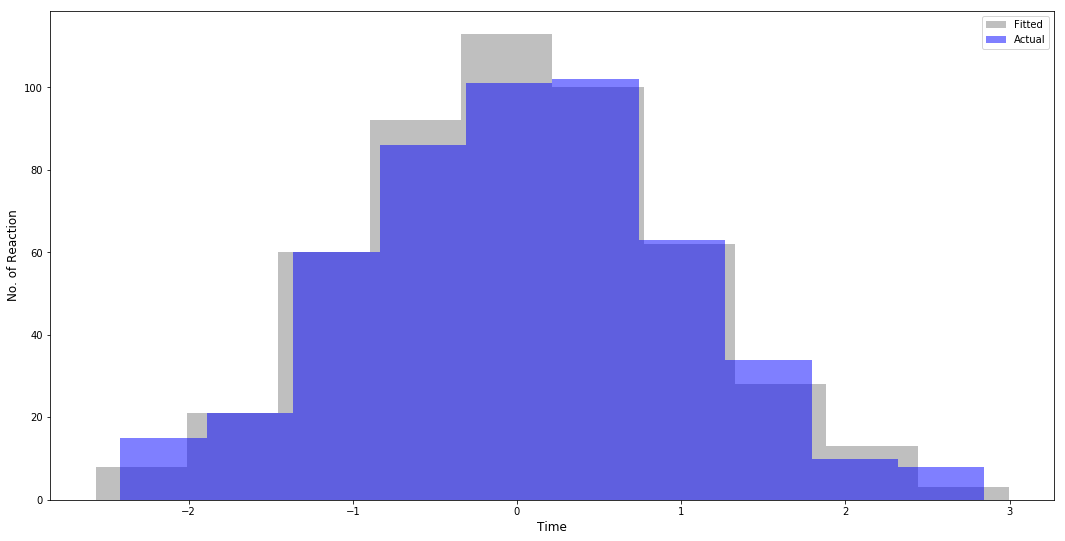

In [240]:
from scipy.stats import norm
r = norm.rvs(size=500)   #normal


dst = Distribution()
dst.Fit(r)
dst.Plot(r)
dst.PValue

In [162]:
# The wait times are exponentially distributed

expon
0.5196528057102825


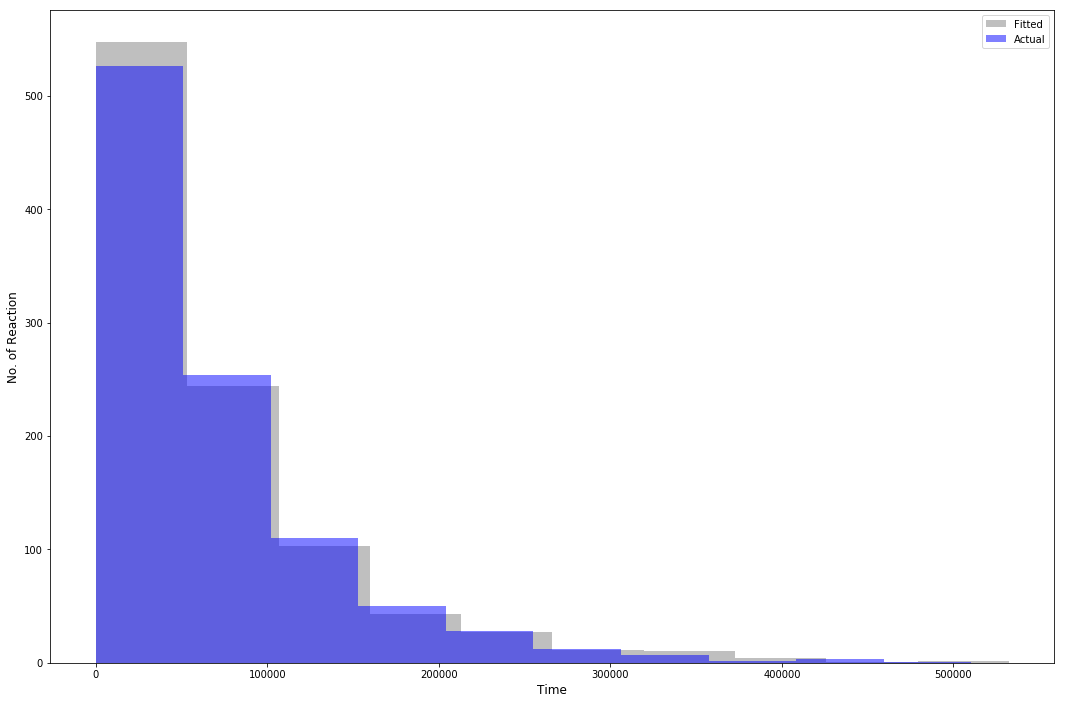

In [241]:
from scipy.stats import expon
r = result.values()

dst = Distribution()
dst.Fit(r)
dst.Plot(r)
print dst.DistributionName
print dst.PValue
plt.savefig('/Users/ganglion/Downloads/waiting_times.pdf')